# **Business Case: Walmart - Confidence Interval and CLT**

## **About Walmart**

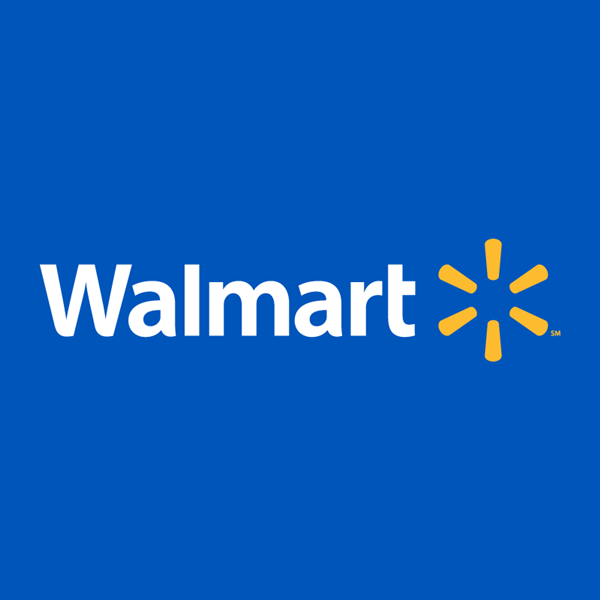

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

## **Business Problem**
This project aims to analyze customer purchase behavior during Walmart Inc.'s Black Friday sales, focusing on purchase amounts by gender. The insights will help Walmart's management make informed, data-driven decisions.

## **Dataset Features**

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday.

The dataset has the following features:


- User_ID:	User ID
- Product_ID:	Product ID
- Gender:	Sex of User
- Age:	Age in bins
- Occupation:	Occupation(Masked)
- City_Category:	Category of the City (A,B,C)
- StayInCurrentCityYears:	Number of years stay in current city
- Marital_Status:	Marital Status
- ProductCategory:	Product Category (Masked)
- Purchase:	Purchase Amount

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Downloading dataset

!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094 -O "walmart.csv"

--2024-08-14 06:35:11--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.164.173.58, 18.164.173.18, 18.164.173.117, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.164.173.58|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23027994 (22M) [text/plain]
Saving to: ‘walmart.csv’

walmart.csv         100%[===================>]  21.96M  66.7MB/s    in 0.3s    

2024-08-14 06:35:12 (66.7 MB/s) - ‘walmart.csv’ saved [23027994/23027994]



In [ ]:
data = pd.read_csv("walmart.csv")

In [ ]:
data.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                          2               0                 3      8370  
1                          2               0                 1     15200  
2                          2               0                12      1422  
3                          2               0                12      1057  
4                         4+               0                 8      7969

In [ ]:
data.tail()

User_ID Product_ID Gender    Age  Occupation City_Category  \
550063  1006033  P00372445      M  51-55          13             B   
550064  1006035  P00375436      F  26-35           1             C   
550065  1006036  P00375436      F  26-35          15             B   
550066  1006038  P00375436      F    55+           1             C   
550067  1006039  P00371644      F  46-50           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
550063                          1               1                20       368  
550064                          3               0                20       371  
550065                         4+               1                20       137  
550066                          2               0                20       365  
550067                         4+               1                20       490

In [ ]:
data.shape

(550068, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
for i in data.columns:
  print(f"Unique Values of {i} : {data[i].nunique()}")

Unique Values of User_ID : 5891
Unique Values of Product_ID : 3631
Unique Values of Gender : 2
Unique Values of Age : 7
Unique Values of Occupation : 21
Unique Values of City_Category : 3
Unique Values of Stay_In_Current_City_Years : 5
Unique Values of Marital_Status : 2
Unique Values of Product_Category : 20
Unique Values of Purchase : 18105


🔍 Insights :

- After reviewing the unique values in all 10 columns, it was found that all columns, except for the purchase column, contain categorical data.

# Categorical Data Conversion

In [ ]:
cat_col = ["User_ID","Product_ID", "Gender","Age","Occupation","City_Category" , "Stay_In_Current_City_Years","Marital_Status","Product_Category"]

for i in cat_col:
  data[i] = data[i].astype("category")

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(9), int64(1)
memory usage: 10.3 MB


In [ ]:
data.describe(include = "category") #Statistical Summary Of Categorical Data type

User_ID Product_ID  Gender     Age  Occupation City_Category  \
count    550068     550068  550068  550068      550068        550068   
unique     5891       3631       2       7          21             3   
top     1001680  P00265242       M   26-35           4             B   
freq       1026       1880  414259  219587       72308        231173   

       Stay_In_Current_City_Years  Marital_Status  Product_Category  
count                      550068          550068            550068  
unique                          5               2                20  
top                             1               0                 5  
freq                       193821          324731            150933

🔍 Insights :

- User_ID: There are 5,891 unique customers, with the most frequent customer appearing 1,026 times.
- Product_ID: A total of 3,631 unique products were purchased, with the top product being purchased 1,880 times.
- Gender: The majority of customers are male, with "M" appearing 414,259 times.
- Age: The most common age group is 26-35, accounting for 219,587 purchases.
- Occupation: There are 21 different occupations, with the most common one (labeled as "4") having 72,308 entries.
- City_Category: Most customers are from City Category "B," with 231,173 purchases.
- Stay_In_Current_City_Years: The majority of customers have lived in their current city for 1 year, with 193,821 entries.
- Marital_Status: Most customers are unmarried, with a marital status of "0(Unmarried)" appearing 324,731 times.
- Product_Category: There are 20 different product categories, with the most common category (labeled as "5") having 150,933 purchases.

In [ ]:
data.describe() # Statistical Summary of Numerical Data type

Purchase
count  550068.000000
mean     9263.968713
std      5023.065394
min        12.000000
25%      5823.000000
50%      8047.000000
75%     12054.000000
max     23961.000000

- Purchase: The average purchase amount is approximately 9,264, with most purchases ranging between 5,823 and 12,054. The median purchase amount is 8047 which is lower than the mean/average purchase amount, indicating some outliers present in the dataset.








# **Duplicate Entries Check**

In [ ]:
data.duplicated().sum()

0

- There are no duplicates in the dataset.


# **Null Values Check**

In [ ]:
data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

- There are no null values in the dataset

# Replacing Values Of Gender & Marital_Status Column

- Gender  : M = Male / F = Female
- Marital_Status : 0 = Unmarried / 1 = Married

In [ ]:
data["Gender"].replace({"M":"Male","F":"Female"},inplace = True) # Replace M with Male and F with Female

In [ ]:
data["Gender"].unique() #Check

['Female', 'Male']
Categories (2, object): ['Female', 'Male']

In [ ]:
data["Marital_Status"].replace({0:"Unmarried",1:"Married"},inplace = True) # Replacing 0 with Unmarried and 1 with Married

In [ ]:
data["Marital_Status"].unique() #Check

['Unmarried', 'Married']
Categories (2, object): ['Unmarried', 'Married']

# **Univariate Analysis**

## Gender & Marital Status Distribution

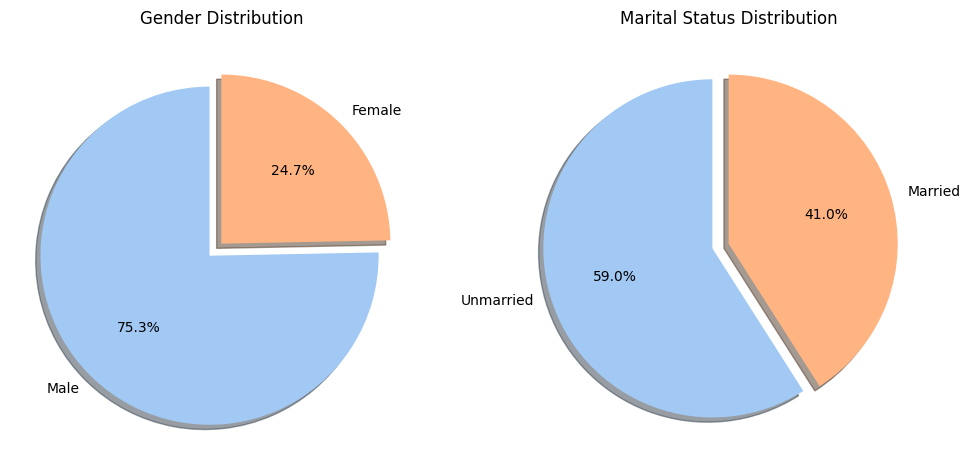

In [ ]:
colors = sns.color_palette("pastel")
plt.figure(figsize = (12,8))
plt.subplot(1,2,1)
plt.pie(data["Gender"].value_counts(), labels = data["Gender"].value_counts().index, autopct = "%.1f%%", shadow = True,explode =(0.10,0),startangle = 90, colors = colors)
plt.title("Gender Distribution")
plt.subplot(1,2,2)
plt.pie(data["Marital_Status"].value_counts(), labels = data["Marital_Status"].value_counts().index, autopct = "%.1f%%", shadow = True,explode =(0.10,0),startangle = 90, colors = colors)
plt.title("Marital Status Distribution")
plt.show()

🔍 Insights

- Gender Distribution: Males dominated purchase behavior during the Black Friday event.
- Marital Status: Unmarried customers led in transaction volume, suggesting targeted marketing opportunities.

## City category Distribution

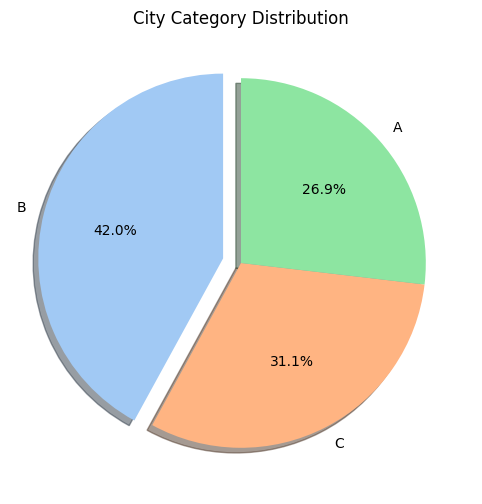

In [ ]:
plt.figure(figsize = (8,6))
plt.pie(data["City_Category"].value_counts(), labels = data["City_Category"].value_counts().index, autopct = "%.1f%%", shadow = True,explode =(0.10,0,0),startangle = 90, colors = colors)
plt.title("City Category Distribution")
plt.show()

🔍 Insights

- City Category: City B had the highest transactions, followed by City C and City A.

#  Customer Age Distribution

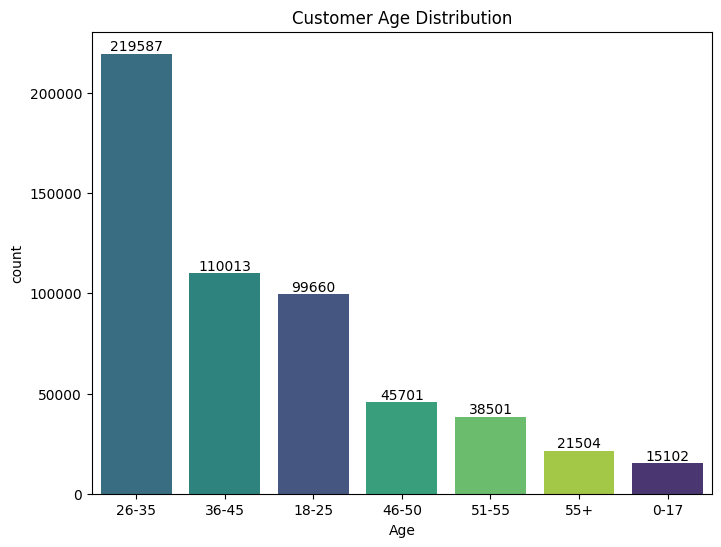

In [ ]:
plt.figure(figsize=(8,6))
bar = sns.countplot(data = data , x = "Age",hue = "Age",order = data["Age"].value_counts().index, palette = "viridis")
for i in bar.containers:
  bar.bar_label(i)
plt.title("Customer Age Distribution")

plt.show()

In [ ]:
round(data["Age"].value_counts(normalize = "index"),2)

Age
26-35    0.40
36-45    0.20
18-25    0.18
46-50    0.08
51-55    0.07
55+      0.04
0-17     0.03
Name: proportion, dtype: float64

🔍 Insights

- The 26-35 age group dominates Walmart's sales with 40%, indicating strong engagement from young and middle-aged adults, who are likely to seek out deals during sales events.

- The lower proportions of the 46-50 (8%), 51-55 (7%), 55+ (4%), and 0-17 (3%) segments suggest a need for targeted marketing strategies and tailored product offerings to enhance appeal among older customers and families with children.

# Customer Current City Staying Duration Distribution

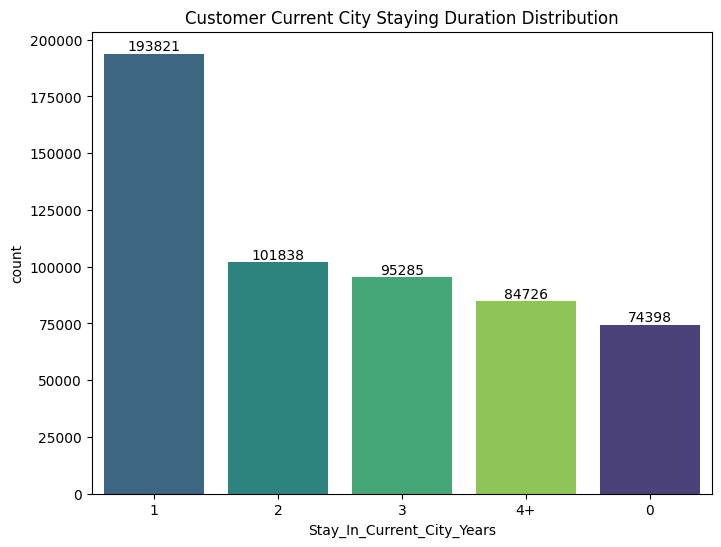

In [ ]:
plt.figure(figsize=(8,6))

bar = sns.countplot(data = data , x = "Stay_In_Current_City_Years",hue = "Stay_In_Current_City_Years",order = data["Stay_In_Current_City_Years"].value_counts().index, palette = "viridis")
for i in bar.containers:
  bar.bar_label(i)

plt.title("Customer Current City Staying Duration Distribution")

plt.show()

In [ ]:
round(data["Stay_In_Current_City_Years"].value_counts(normalize = "index"),2)

Stay_In_Current_City_Years
1     0.35
2     0.19
3     0.17
4+    0.15
0     0.14
Name: proportion, dtype: float64

🔍 Insights
- The majority of customers (35%) have stayed in their current city for 1 year, indicating a transient population that may be more likely to seek convenience and value in their shopping choices.

- With 19% of customers residing for 2 years and 17% for 3 years, Walmart should consider tailoring marketing efforts to enhance loyalty among longer-term residents while also addressing the needs of newer customers.

# Top 5 Product Categories Distribution

In [ ]:
top5_product_cat = data[data["Product_Category"].isin(data["Product_Category"].value_counts().head().index.tolist())] # filtered top 5 product category sold dataset

In [ ]:
top5_product_cat["Product_Category"] = top5_product_cat["Product_Category"].astype(int) # Converting categorical column to int to filter out 0 values outcome from value count

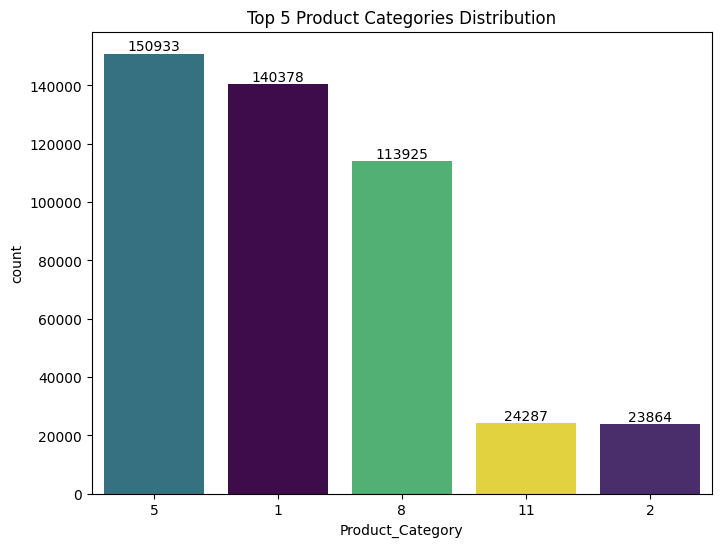

In [ ]:
plt.figure(figsize=(8,6))

bar = sns.countplot(data = top5_product_cat , x = "Product_Category",hue = "Product_Category",legend = False , order = top5_product_cat["Product_Category"].value_counts().index, palette = "viridis")
for i in bar.containers:
  bar.bar_label(i)

plt.title("Top 5 Product Categories Distribution")

plt.show()

In [ ]:
round(data["Product_Category"].value_counts(normalize = "index").head(),2)

Product_Category
5     0.27
1     0.26
8     0.21
11    0.04
2     0.04
Name: proportion, dtype: float64

🔍 Insights

- Categories 5, 1, and 8 dominate the sales landscape, making up nearly 75% of total purchases, indicating a clear consumer preference for these items and highlighting an opportunity for Walmart to strategically enhance promotions and stock levels in these areas.

# Occupation Distribution

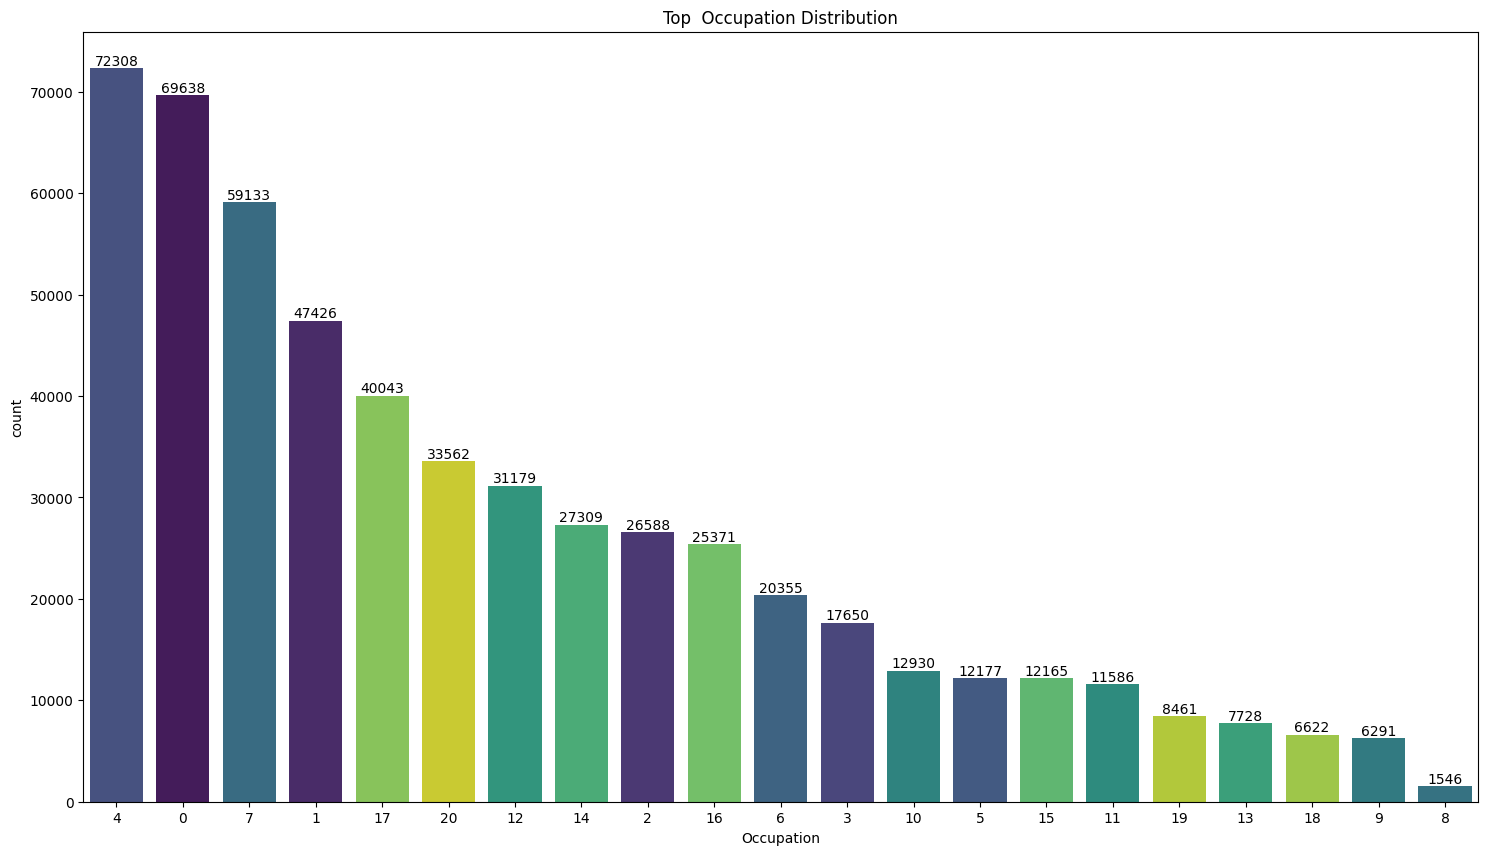

In [ ]:
plt.figure(figsize=(18,10))

bar = sns.countplot(data = data , x = "Occupation",hue = "Occupation",legend = False , order = data["Occupation"].value_counts().index, palette = "viridis")
for i in bar.containers:
  bar.bar_label(i)

plt.title("Top  Occupation Distribution")
plt.show()

In [ ]:
round(data["Occupation"].value_counts(normalize = "index"),2)

Occupation
4     0.13
0     0.13
7     0.11
1     0.09
17    0.07
20    0.06
12    0.06
14    0.05
2     0.05
16    0.05
6     0.04
3     0.03
10    0.02
5     0.02
15    0.02
11    0.02
19    0.02
13    0.01
18    0.01
9     0.01
8     0.00
Name: proportion, dtype: float64

🔍 Insights

- Customers belonging to Occupation categories 4, 0, and 7 collectively represent around 37% of total purchases, highlighting a significant affinity for Walmart's offerings among these groups. This suggests that individuals in these occupations are likely to prioritize value and convenience, making them key targets for future marketing strategies.








# Customer Purchase Distribution

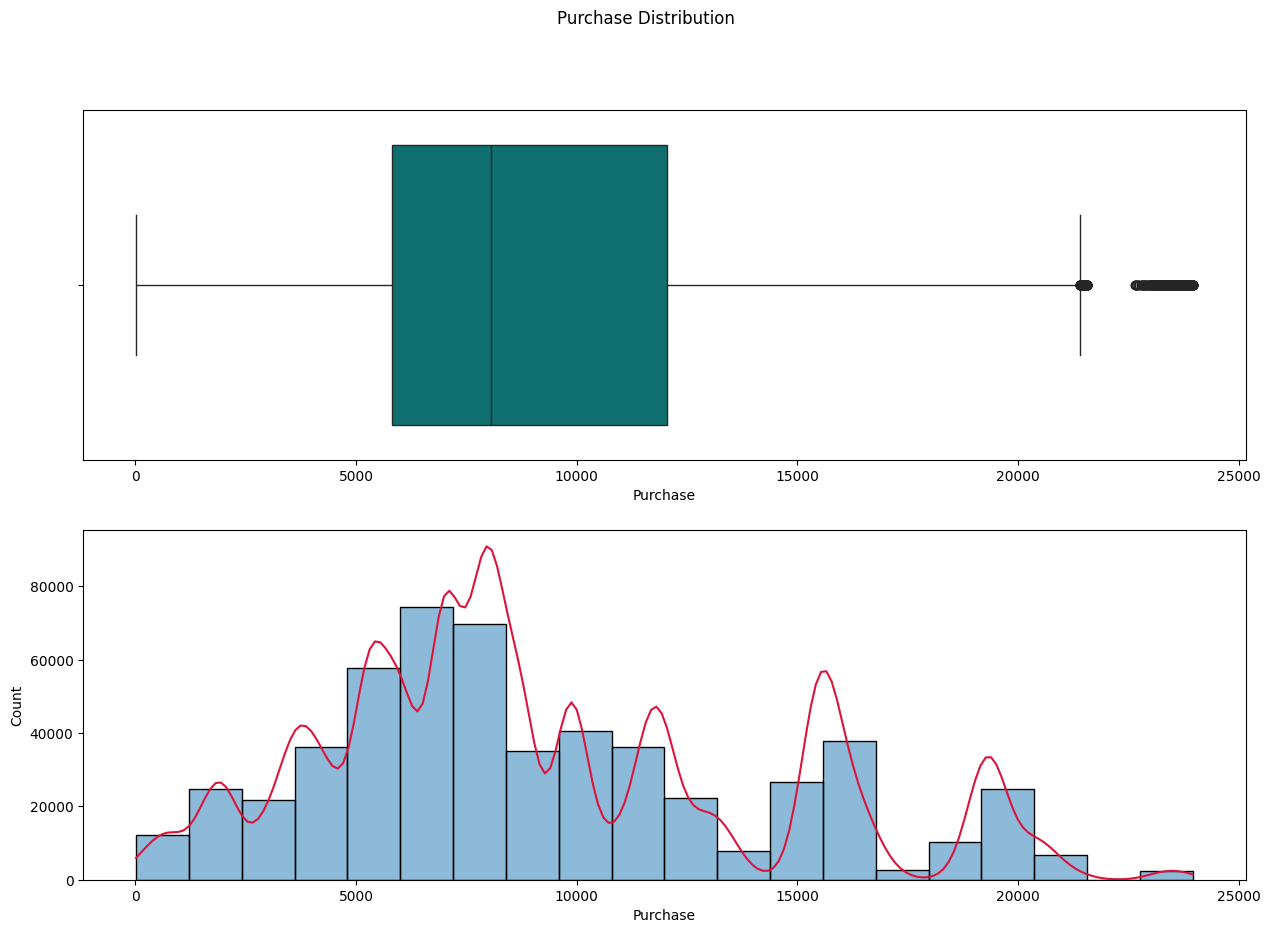

In [ ]:
plt.figure(figsize = (15 , 10))
plt.subplot(2,1,1)
sns.boxplot(data = data , x = "Purchase",color = "teal")
plt.subplot(2,1,2)
hist = sns.histplot(data = data , x = "Purchase",bins = 20,kde = True)
hist.lines[0].set_color("crimson")
plt.suptitle("Purchase Distribution")
plt.show()


🔍 Insights

- The majority of purchase amounts are concentrated between 5,823 USD and 12,054 USD, with the median purchase value at approximately 8,047 USD, indicating that most customers' spending falls within this range.

- The presence of outliers beyond 20,000 USD suggests that a small segment of customers makes significantly larger purchases, which could be targeted with personalized marketing strategies.

# **Bivariate Analysis**

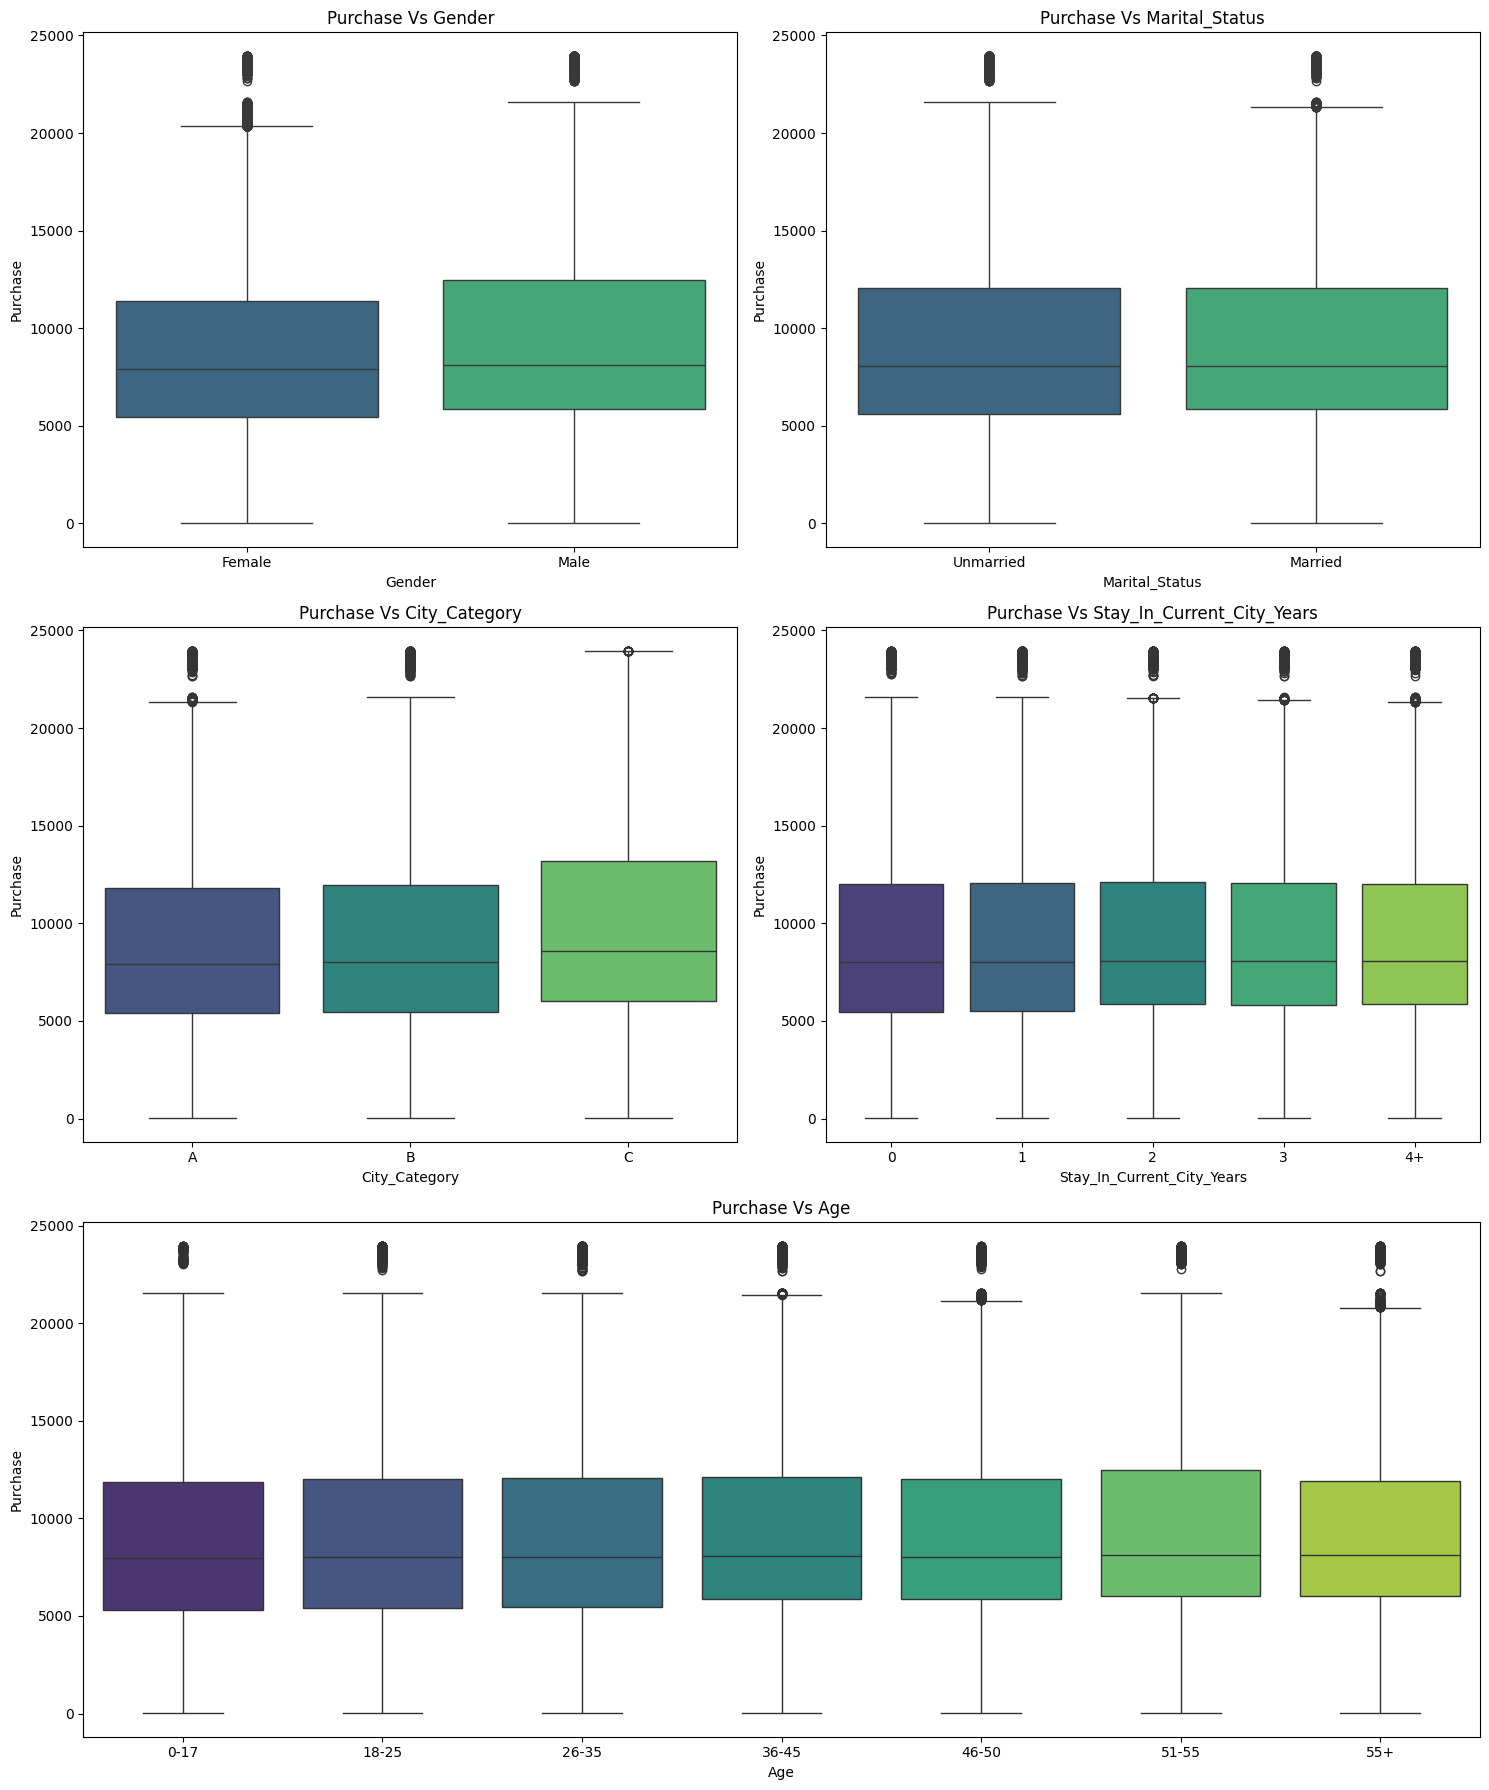

In [ ]:
col = ["Gender","Marital_Status","City_Category","Stay_In_Current_City_Years"]
plt.figure(figsize = (15,18))
for i , j in enumerate(col):
  i = i+1
  plt.subplot(3,2,i)
  sns.boxplot(data = data , x = j , y = "Purchase" ,palette = "viridis")
  plt.title(f"Purchase Vs {j}")

plt.subplot(3,1,3)
sns.boxplot(data = data , x = "Age" , y = "Purchase",palette = "viridis")
plt.title("Purchase Vs Age")
plt.tight_layout()
plt.show()

🔍 Insights

- Across gender, marital status, and city categories, the median purchase amount remains consistently similar, with no significant differences observed.

- The duration of stay in the current city does not appear to influence purchase behavior significantly, as median spending is stable across different lengths of residence.

- Age groups also show a consistent median purchase amount, suggesting that customer spending habits are relatively uniform across different age demographics.

# **Multivariate Analysis**

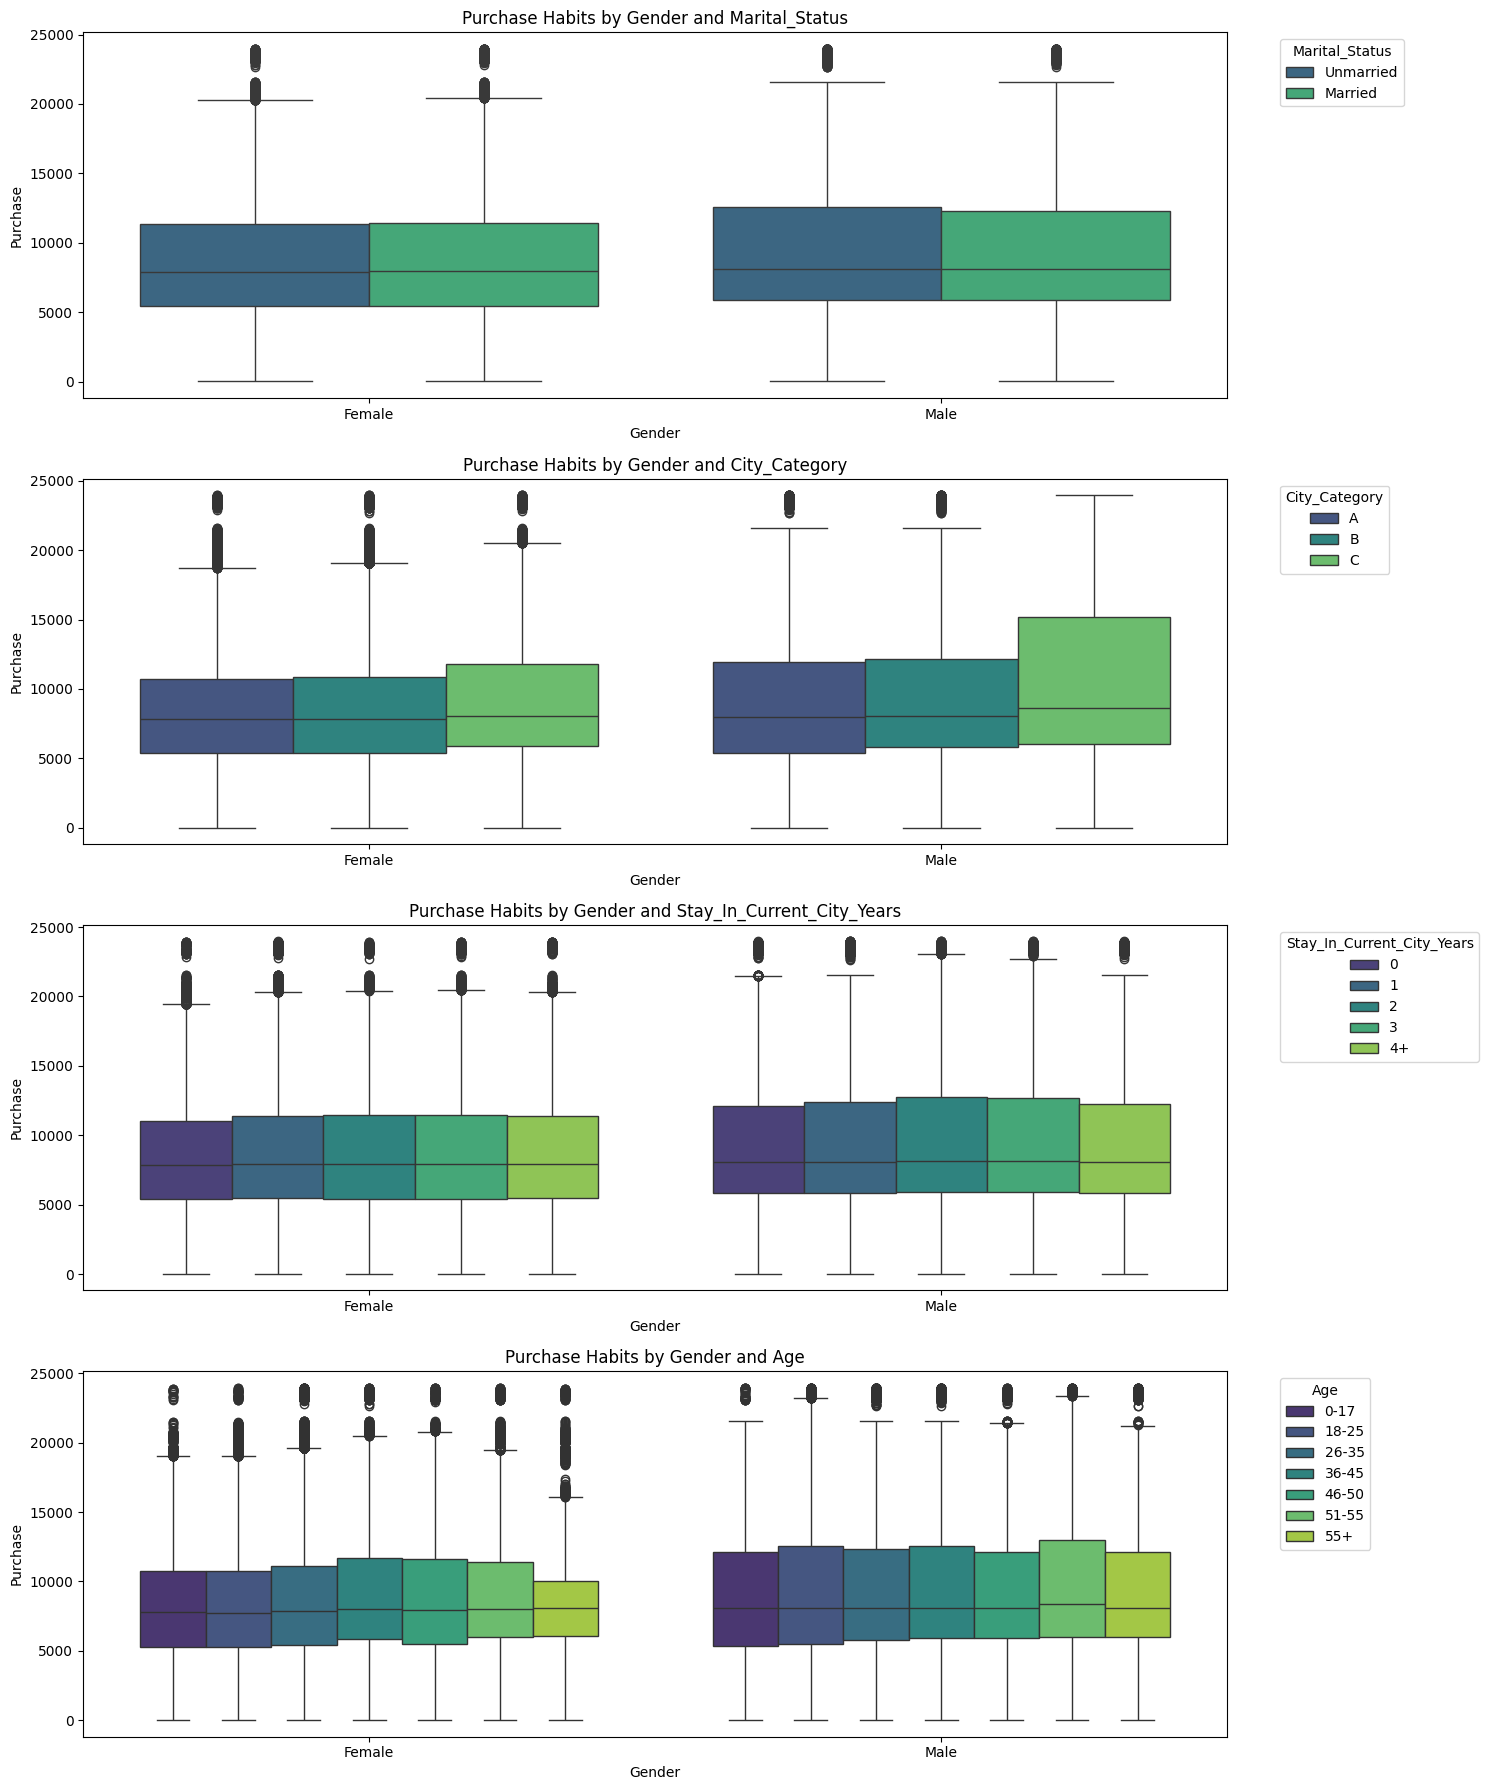

In [152]:
col = ["Marital_Status","City_Category","Stay_In_Current_City_Years","Age"]
plt.figure(figsize = (15,18))
for i , j in enumerate(col):
  i = i+1
  plt.subplot(4,1,i)
  sns.boxplot(data = data , x = "Gender" , y = "Purchase",hue = j,palette = "viridis")
  plt.title(f"Purchase Habits by Gender and {j}")
  plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left",title = j)

plt.tight_layout()
plt.show()


🔍 Insights

- Median spending values are lowest for females aged 18-25, while they increase with age, peaking in the 51-55 age group.
City category C shows the highest median spending for both females and males, surpassing cities A and B.
- Female spending is slightly lower for those who have lived in their residence for 3 or 0 years, with no significant difference observed in male spending.

# CENTRAL LIMIT THEOREM

## Gender VS Purchase

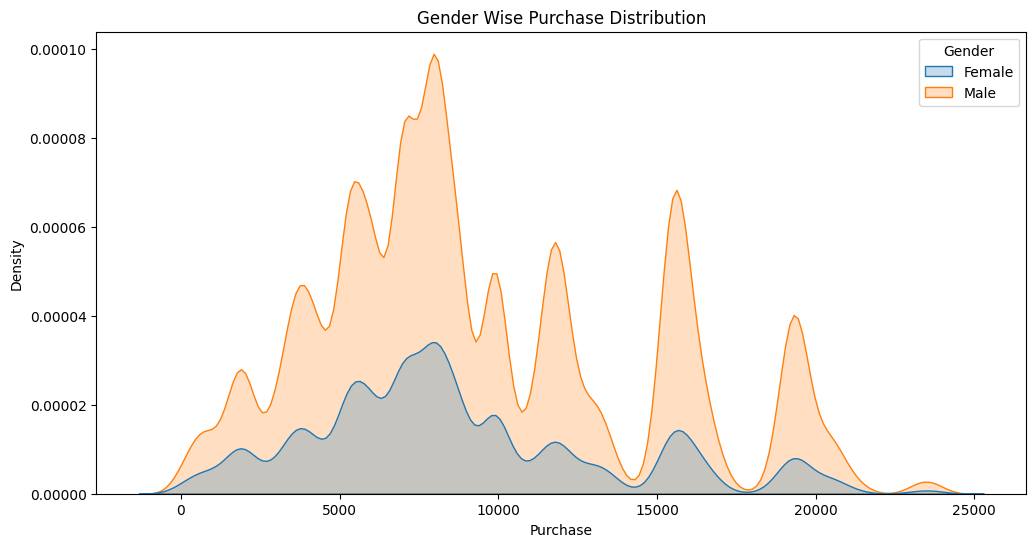

In [ ]:
plt.figure(figsize = (12,6))
sns.kdeplot(data = data ,x = "Purchase",hue = "Gender",fill = True)
plt.title("Gender Wise Purchase Distribution")
plt.show()

Purchase amount Not normally distrubuted between genders

In [ ]:
data.groupby("Gender")["Purchase"].describe()

count         mean          std   min     25%     50%      75%  \
Gender                                                                      
Female  135809.0  8734.565765  4767.233289  12.0  5433.0  7914.0  11400.0   
Male    414259.0  9437.526040  5092.186210  12.0  5863.0  8098.0  12454.0   

            max  
Gender           
Female  23959.0  
Male    23961.0

- Males have a higher average purchase amount (9437.53) compared to females (8734.57).
- Males also exhibit greater variability in spending, with a higher standard deviation (5092.19) than females (4767.23).

In [ ]:
male = data.loc[data["Gender"] == "Male"]["Purchase"]
female = data.loc[data["Gender"] == "Female"]["Purchase"]

male_std = male.std()
female_std = female.std()

In [ ]:
sample_size = [300 , 3000 , 30000]
num_sample = 1000

Gender = []
Sample_size = []
Lower_limit = []
Upper_limit = []
Sample_mean = []
CI = []


In [ ]:
def clt(ci):
  ci = ci/100
  plt.figure(figsize = (12,20))
  for i,j in enumerate(sample_size):
    i = i+1
    plt.subplot(3,1,i)



    male_sample = [np.mean(male.sample(j)) for k in range(num_sample)]
    male_sample_mean = np.mean(male_sample).round(2)
    male_se = male_std/np.sqrt(j)
    male_se = male_se.round(2)
    lower_limit_male , upper_limit_male = norm.interval(ci,loc = male_sample_mean,scale = male_se )
    lower_limit_male = lower_limit_male.round(2)
    upper_limit_male = upper_limit_male.round(2)


    Gender.append("Male")
    Sample_size.append(j)
    Lower_limit.append(lower_limit_male)
    Upper_limit.append(upper_limit_male)
    CI.append(ci*100)
    Sample_mean.append(male_sample_mean)



    label_mean_male = (f"Male Sample Mean = {male_sample_mean}")
    label_lower_limit_male = (f"Lower Limit (MALE) {lower_limit_male}")
    label_upper_limit_male = (f"Upper Limit (MALE) {upper_limit_male}")
    plt.axvline(male_sample_mean,color = "teal", linestyle = "solid",linewidth = 2,label = label_mean_male )
    plt.axvline(lower_limit_male,color = "teal", linestyle = "dashdot",linewidth = 2, label = label_lower_limit_male )
    plt.axvline(upper_limit_male,color = "teal", linestyle = "dashdot",linewidth = 2, label = label_upper_limit_male )
    plt.legend(loc = "upper right")


    female_sample = [np.mean(female.sample(j)) for k in range(num_sample)]
    female_sample_mean = np.mean(female_sample).round(2)
    female_se = female_std/np.sqrt(j)
    female_se = female_se.round(2)
    lower_limit_female , upper_limit_female = norm.interval(ci,loc = female_sample_mean,scale = female_se )
    upper_limit_female = upper_limit_female.round(2)
    lower_limit_female = lower_limit_female.round(2)


    Gender.append("Female")
    Sample_size.append(j)
    Lower_limit.append(lower_limit_female)
    Upper_limit.append(upper_limit_female)
    CI.append(ci*100)
    Sample_mean.append(female_sample_mean)




    label_mean_female = (f"feMale Sample Mean = {female_sample_mean}")
    label_lower_limit_female = (f"Lower Limit (FEMALE) {lower_limit_female}")
    label_upper_limit_female = (f"Upper Limit (FEMALE) {upper_limit_female}")
    plt.axvline(female_sample_mean,color = "red", linestyle = "solid",linewidth = 2,label = label_mean_female )
    plt.axvline(lower_limit_female,color = "red", linestyle = "dashdot",linewidth = 2, label = label_lower_limit_female )
    plt.axvline(upper_limit_female,color = "red", linestyle = "dashdot",linewidth = 2, label = label_upper_limit_female )
    plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")


    sns.kdeplot(x = male_sample,fill = True, color = "grey")
    sns.kdeplot(x = female_sample,fill = True,color = "lightblue")
    plt.title(f"Sample Size = {j} , Male_Mean = {male_sample_mean} , Male_sample_SE = {male_se} , Female_mean = {female_sample_mean}, Female_sample_SE = {female_se}")

  plt.suptitle(f"{ci*100} % CONFIDENCE INTERVAL  MALE VS FEMALE PURCHASE DISTRIBUTION", fontsize = (15))
  plt.show()



# 90 % Confidence Interval

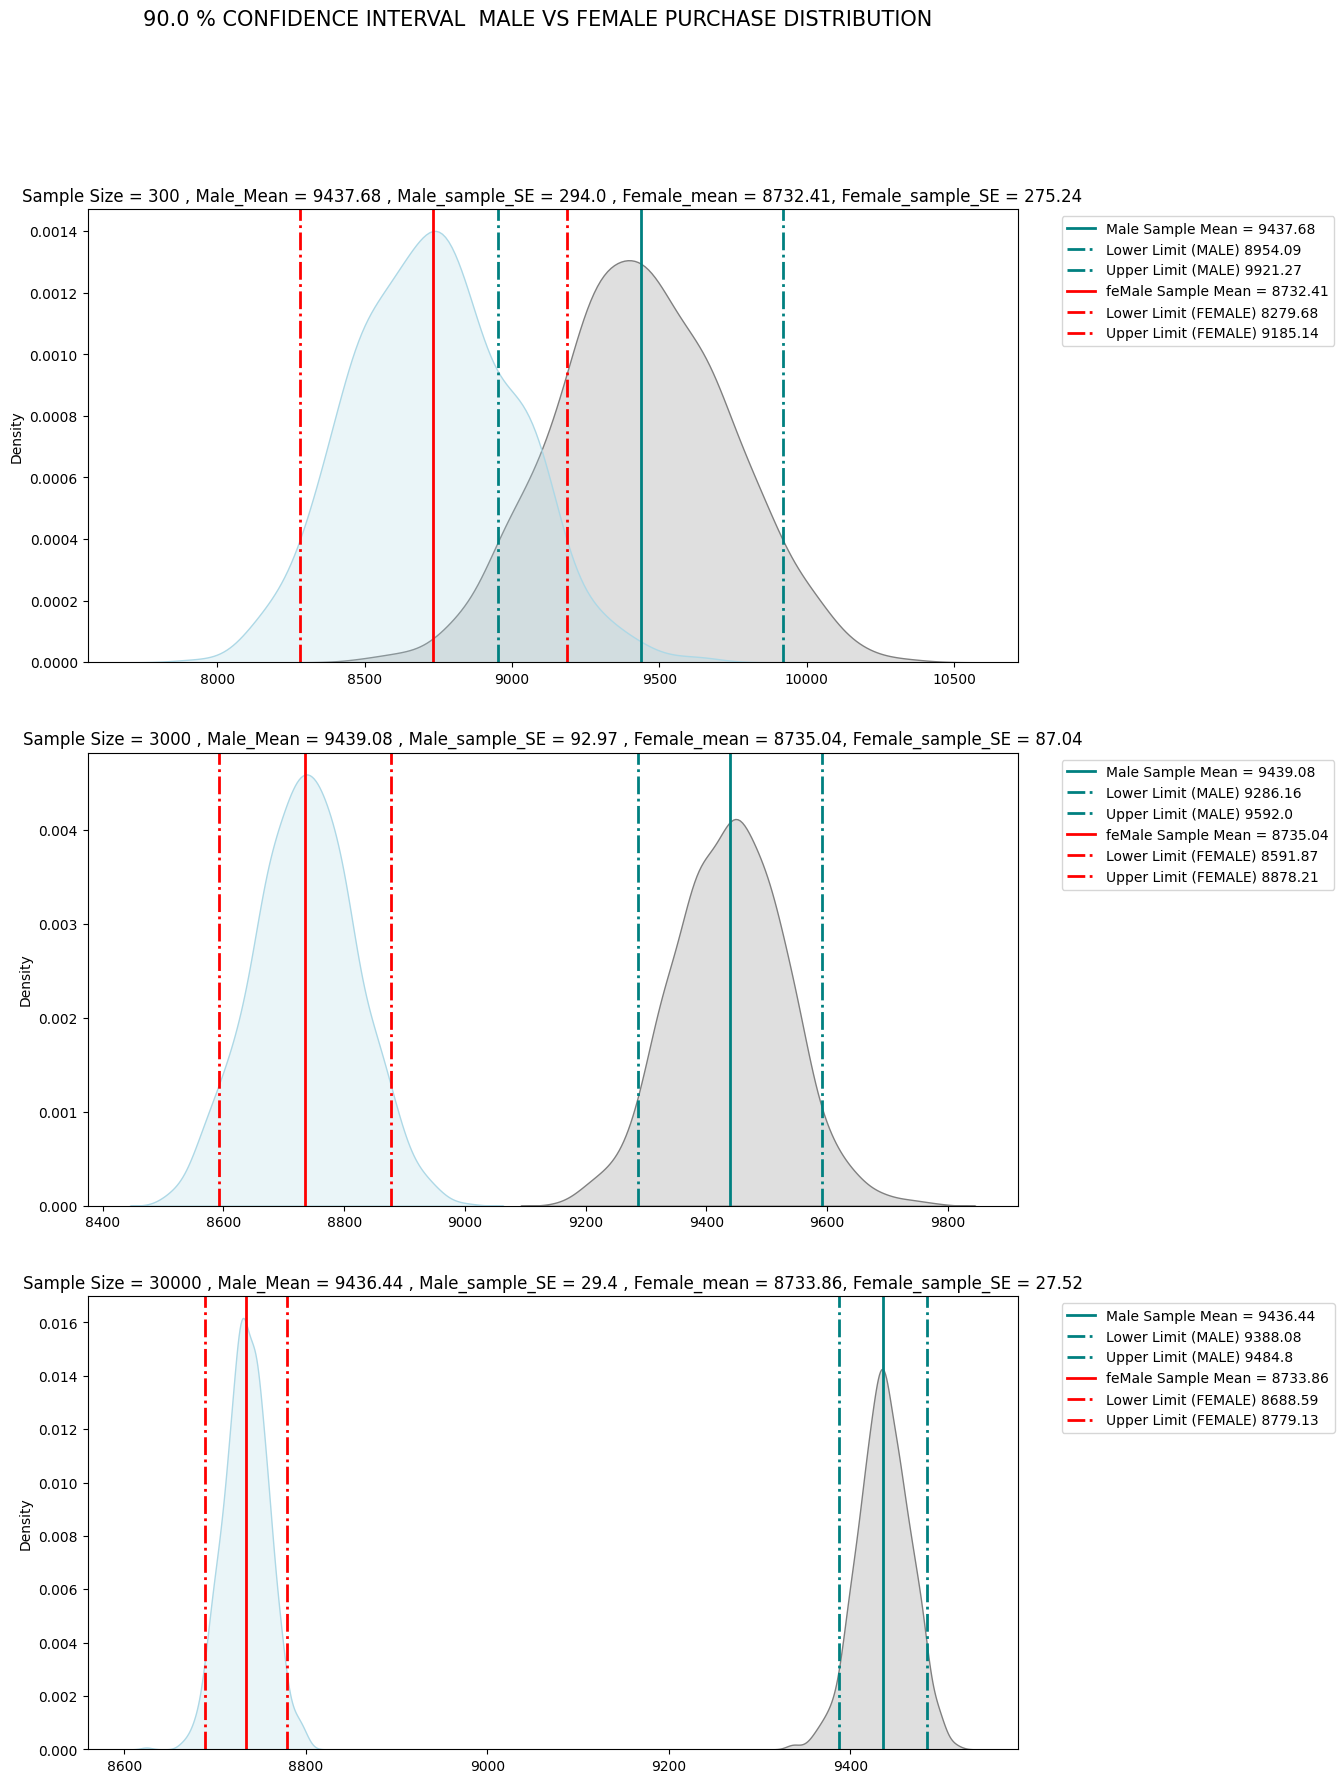

In [ ]:
clt(90)

🔍 Insights

- For both genders, as the sample size increases, the confidence interval becomes narrower, indicating more precision in the estimate of average purchases.
- The confidence intervals for males and females do not overlap, indicating a clear difference in average purchases.

# 95 % Confidence Interval

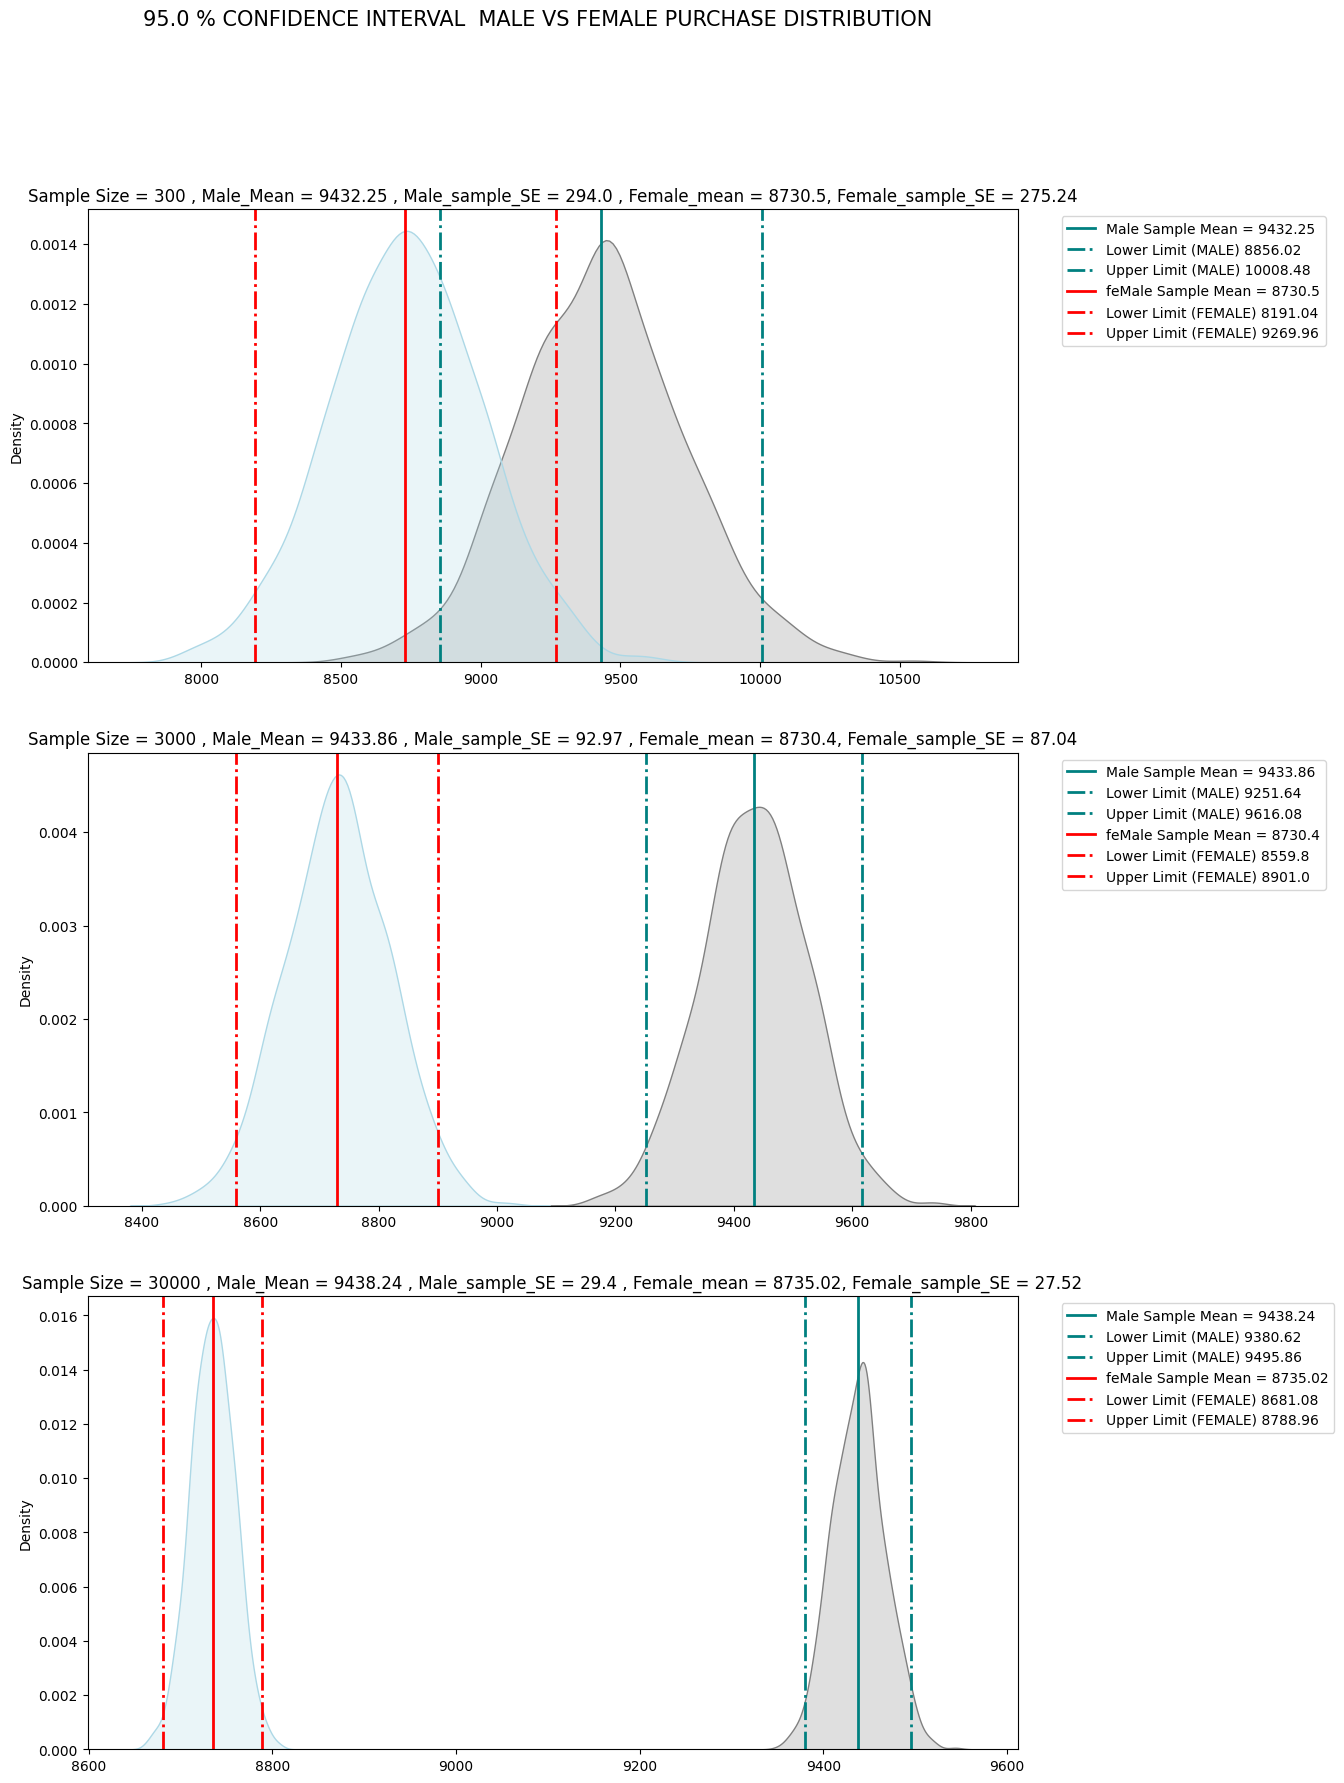

In [ ]:
clt(95)

# 99 % Confidence Interval

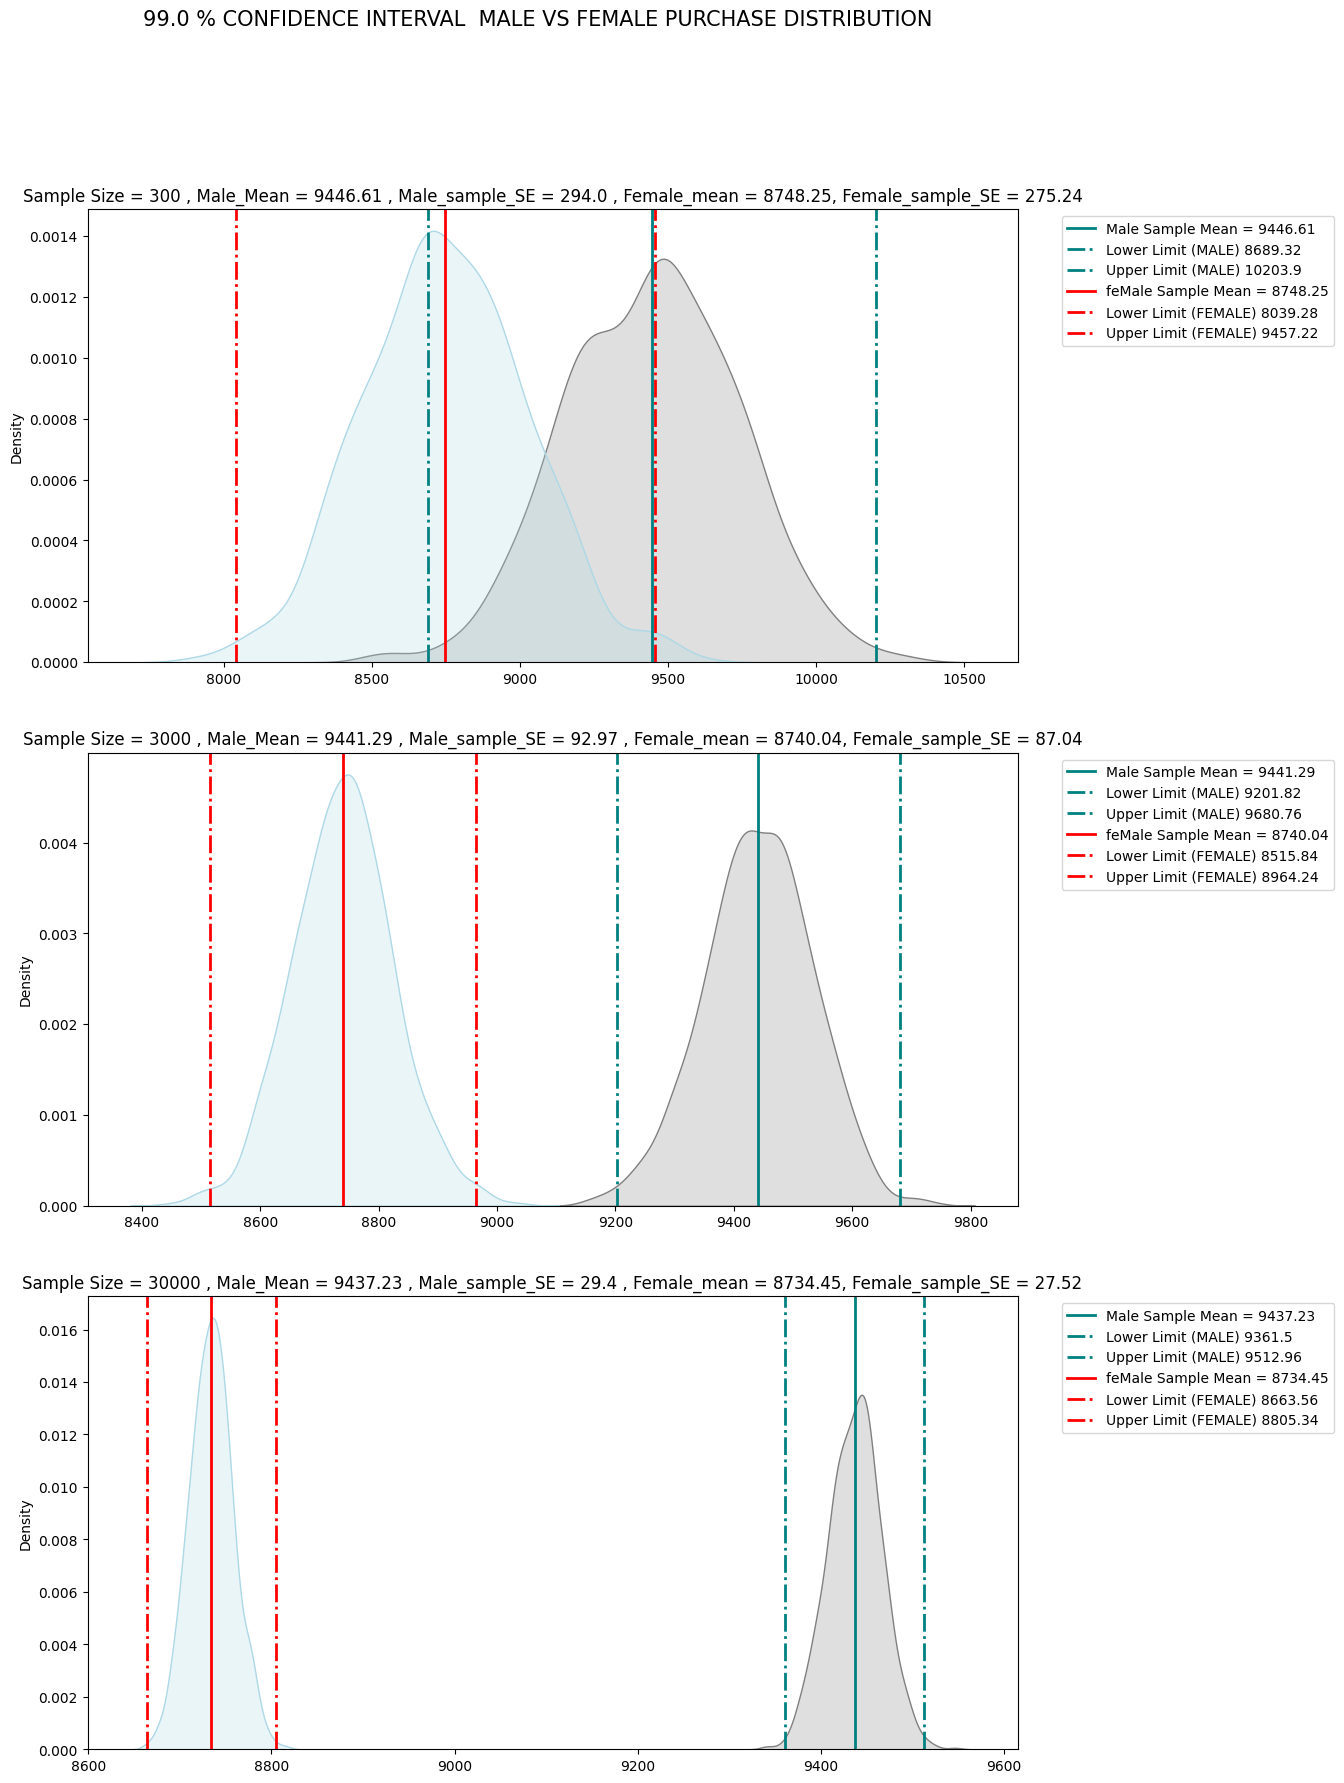

In [ ]:
clt(99)

In [ ]:
temp = {"Gender" : Gender, "Sample_size": Sample_size ,"Sample_mean" : Sample_mean, "Lower_limit" : Lower_limit , "Upper_limit": Upper_limit , "CI" : CI }

In [ ]:
overlap = pd.DataFrame(temp)

In [ ]:
overlap["CI_Range"] = overlap["Upper_limit"] - overlap["Lower_limit"]

In [ ]:
overlap

Gender  Sample_size  Sample_mean  Lower_limit  Upper_limit    CI  CI_Range
0     Male          300      9437.68      8954.09      9921.27  90.0    967.18
1   Female          300      8732.41      8279.68      9185.14  90.0    905.46
2     Male         3000      9439.08      9286.16      9592.00  90.0    305.84
3   Female         3000      8735.04      8591.87      8878.21  90.0    286.34
4     Male        30000      9436.44      9388.08      9484.80  90.0     96.72
5   Female        30000      8733.86      8688.59      8779.13  90.0     90.54
6     Male          300      9432.25      8856.02     10008.48  95.0   1152.46
7   Female          300      8730.50      8191.04      9269.96  95.0   1078.92
8     Male         3000      9433.86      9251.64      9616.08  95.0    364.44
9   Female         3000      8730.40      8559.80      8901.00  95.0    341.20
10    Male        30000      9438.24      9380.62      9495.86  95.0    115.24
11  Female        30000      8735.02      8681.08      8788.96  95.0    107.88
12    Male          300      9446.61      8689.32     10203.90  99.0   1514.58
13  Female          300      8748.25      8039.28      9457.22  99.0   1417.94
14    Male         3000      9441.29      9201.82      9680.76  99.0    478.94
15  Female         3000      8740.04      8515.84      8964.24  99.0    448.40
16    Male        30000      9437.23      9361.50      9512.96  99.0    151.46
17  Female        30000      8734.45      8663.56      8805.34  99.0    141.78

**🔍 Insights**
- Sample Size and Confidence Intervals:

  As the sample size increases, confidence intervals for both genders narrow, leading to more precise purchase estimates. For instance, with a sample size of 30,000, the CI range for males is 96.72, while for females, it is 90.54 at a 90% confidence level.
- Gender Purchase Behavior:

  Males consistently show higher average purchase estimates than females across all confidence levels and sample sizes. For example, at a 95% confidence level with a sample size of 30,000, the average purchase estimate for males is ~ 9400, compared to ~ 8700 for females.


**🛠 Recommendations and improvements :**


- Targeted Marketing Strategies:

  Develop gender-specific marketing campaigns that cater to the spending habits of each group. Since males tend to spend more on average, consider offering premium products or bundles targeted towards male customers.
- Product Offerings and Pricing:

  Adjust product offerings and pricing strategies based on the observed spending patterns. For instance, introduce competitive pricing or discounts on female-oriented products to encourage higher spending among female customers, while maintaining or increasing pricing on products favored by male customers.

## Marital Status VS Purchase

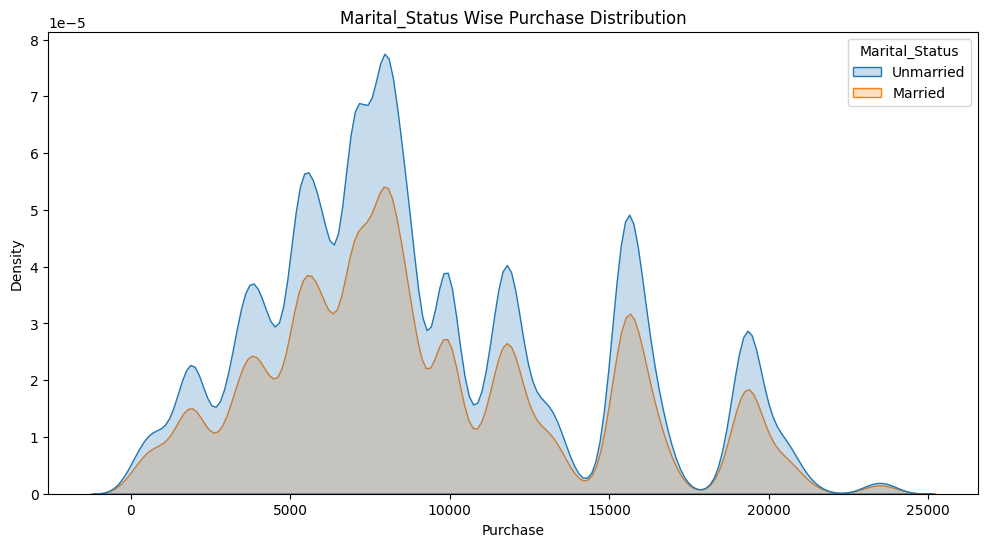

In [ ]:
plt.figure(figsize = (12,6))
sns.kdeplot(data = data ,x = "Purchase",hue = "Marital_Status",fill = True)
plt.title("Marital_Status Wise Purchase Distribution")
plt.show()

In [ ]:
data.groupby("Marital_Status")["Purchase"].describe()

count         mean          std   min     25%     50%  \
Marital_Status                                                             
Unmarried       324731.0  9265.907619  5027.347859  12.0  5605.0  8044.0   
Married         225337.0  9261.174574  5016.897378  12.0  5843.0  8051.0   

                    75%      max  
Marital_Status                    
Unmarried       12061.0  23961.0  
Married         12042.0  23961.0

- Both unmarried and married individuals have nearly identical average purchase amounts (9265.91 for unmarried, 9261.17 for married).
- The spending variability is also similar between the two groups, with standard deviations of 5027.35 (unmarried) and 5016.90 (married)

- Not normally distributed data

In [ ]:
married = data.loc[data["Marital_Status"] == "Married"]["Purchase"]
unmarried = data.loc[data["Marital_Status"] == "Unmarried"]["Purchase"]

In [ ]:
married_std = married.std()
unmarried_std = unmarried.std()

In [ ]:
MS_Status= []
MS_Sample_Size = []
MS_Lower_limit = []
MS_Upper_limit = []
MS_Sample_mean = []
MS_CI = []


In [ ]:
def mclt(ci):
  ci = ci/100
  plt.figure(figsize = (12,20))
  for i,j in enumerate(sample_size):
    i = i+1
    plt.subplot(3,1,i)



    married_sample = [np.mean(married.sample(j)) for k in range(num_sample)]
    married_sample_mean = np.mean(married_sample).round(2)
    married_se = married_std/np.sqrt(j)
    married_se = married_se.round(2)
    lower_limit_married , upper_limit_married = norm.interval(ci,loc = married_sample_mean,scale = married_se )
    lower_limit_married = lower_limit_married.round(2)
    upper_limit_married = upper_limit_married.round(2)


    MS_Status.append("Married")
    MS_Sample_Size.append(j)
    MS_Lower_limit.append(lower_limit_married)
    MS_Upper_limit.append(upper_limit_married)
    MS_CI.append(ci*100)
    MS_Sample_mean.append(married_sample_mean)



    label_mean_married = (f"Married Sample Mean = {married_sample_mean}")
    label_lower_limit_married = (f"Lower Limit (MARRIED) {lower_limit_married}")
    label_upper_limit_married = (f"Upper Limit (MARRIED) {upper_limit_married}")
    plt.axvline(married_sample_mean,color = "teal", linestyle = "solid",linewidth = 2,label = label_mean_married )
    plt.axvline(lower_limit_married,color = "teal", linestyle = "dashdot",linewidth = 2, label = label_lower_limit_married )
    plt.axvline(upper_limit_married,color = "teal", linestyle = "dashdot",linewidth = 2, label = label_upper_limit_married )
    plt.legend(loc = "upper right")


    unmarried_sample = [np.mean(unmarried.sample(j)) for k in range(num_sample)]
    unmarried_sample_mean = np.mean(unmarried_sample).round(2)
    unmarried_se = unmarried_std/np.sqrt(j)
    unmarried_se = unmarried_se.round(2)
    lower_limit_unmarried , upper_limit_unmarried = norm.interval(ci,loc = unmarried_sample_mean,scale = unmarried_se )
    upper_limit_unmarried = upper_limit_unmarried.round(2)
    lower_limit_unmarried = lower_limit_unmarried.round(2)


    MS_Status.append("Unmarried")
    MS_Sample_Size.append(j)
    MS_Lower_limit.append(lower_limit_unmarried)
    MS_Upper_limit.append(upper_limit_unmarried)
    MS_CI.append(ci*100)
    MS_Sample_mean.append(unmarried_sample_mean)




    label_mean_unmarried = (f"Unmarried Sample Mean = {unmarried_sample_mean}")
    label_lower_limit_unmarried = (f"Lower Limit (unmarried) {lower_limit_unmarried}")
    label_upper_limit_unmarried = (f"Upper Limit (unmarried) {upper_limit_unmarried}")
    plt.axvline(unmarried_sample_mean,color = "red", linestyle = "solid",linewidth = 2,label = label_mean_unmarried )
    plt.axvline(lower_limit_unmarried,color = "red", linestyle = "dashdot",linewidth = 2, label = label_lower_limit_unmarried)
    plt.axvline(upper_limit_unmarried,color = "red", linestyle = "dashdot",linewidth = 2, label = label_upper_limit_unmarried )
    plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")


    sns.kdeplot(x = married_sample,fill = True, color = "grey")
    sns.kdeplot(x = unmarried_sample,fill = True,color = "lightblue")
    plt.title(f"Sample Size = {j} , Married_Mean = {married_sample_mean} , Married_sample_SE = {married_se} , unmarried_mean = {unmarried_sample_mean}, unmarried_sample_SE = {unmarried_se}")

  plt.suptitle(f"{ci*100} % CONFIDENCE INTERVAL  MARRIED VS UNMARRIED PURCHASE DISTRIBUTION", fontsize = (15))
  plt.show()



# 90 % Confidence Interval

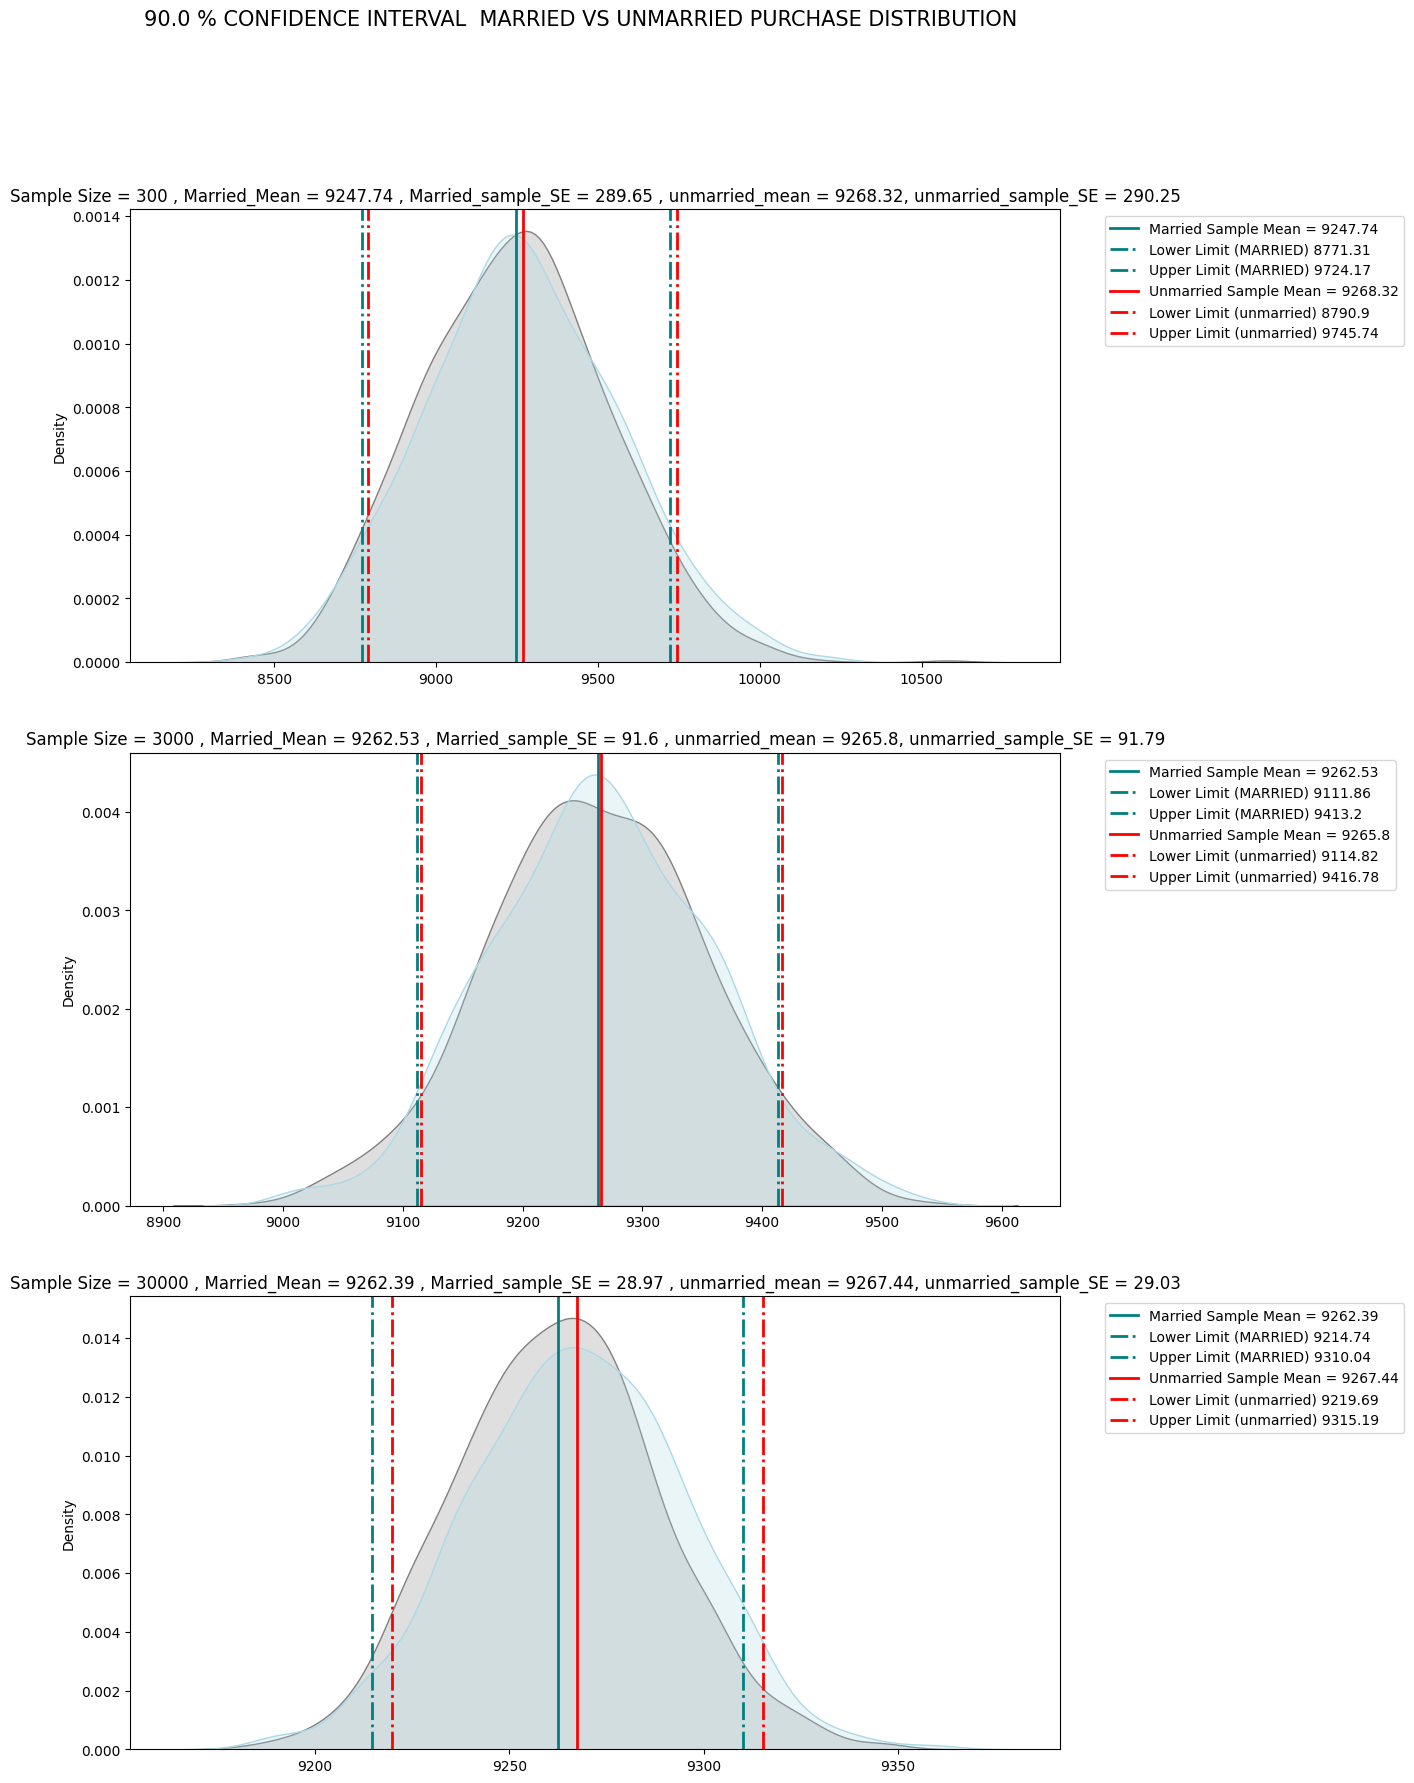

In [ ]:
mclt(90)

# 95 % Confidence Interval

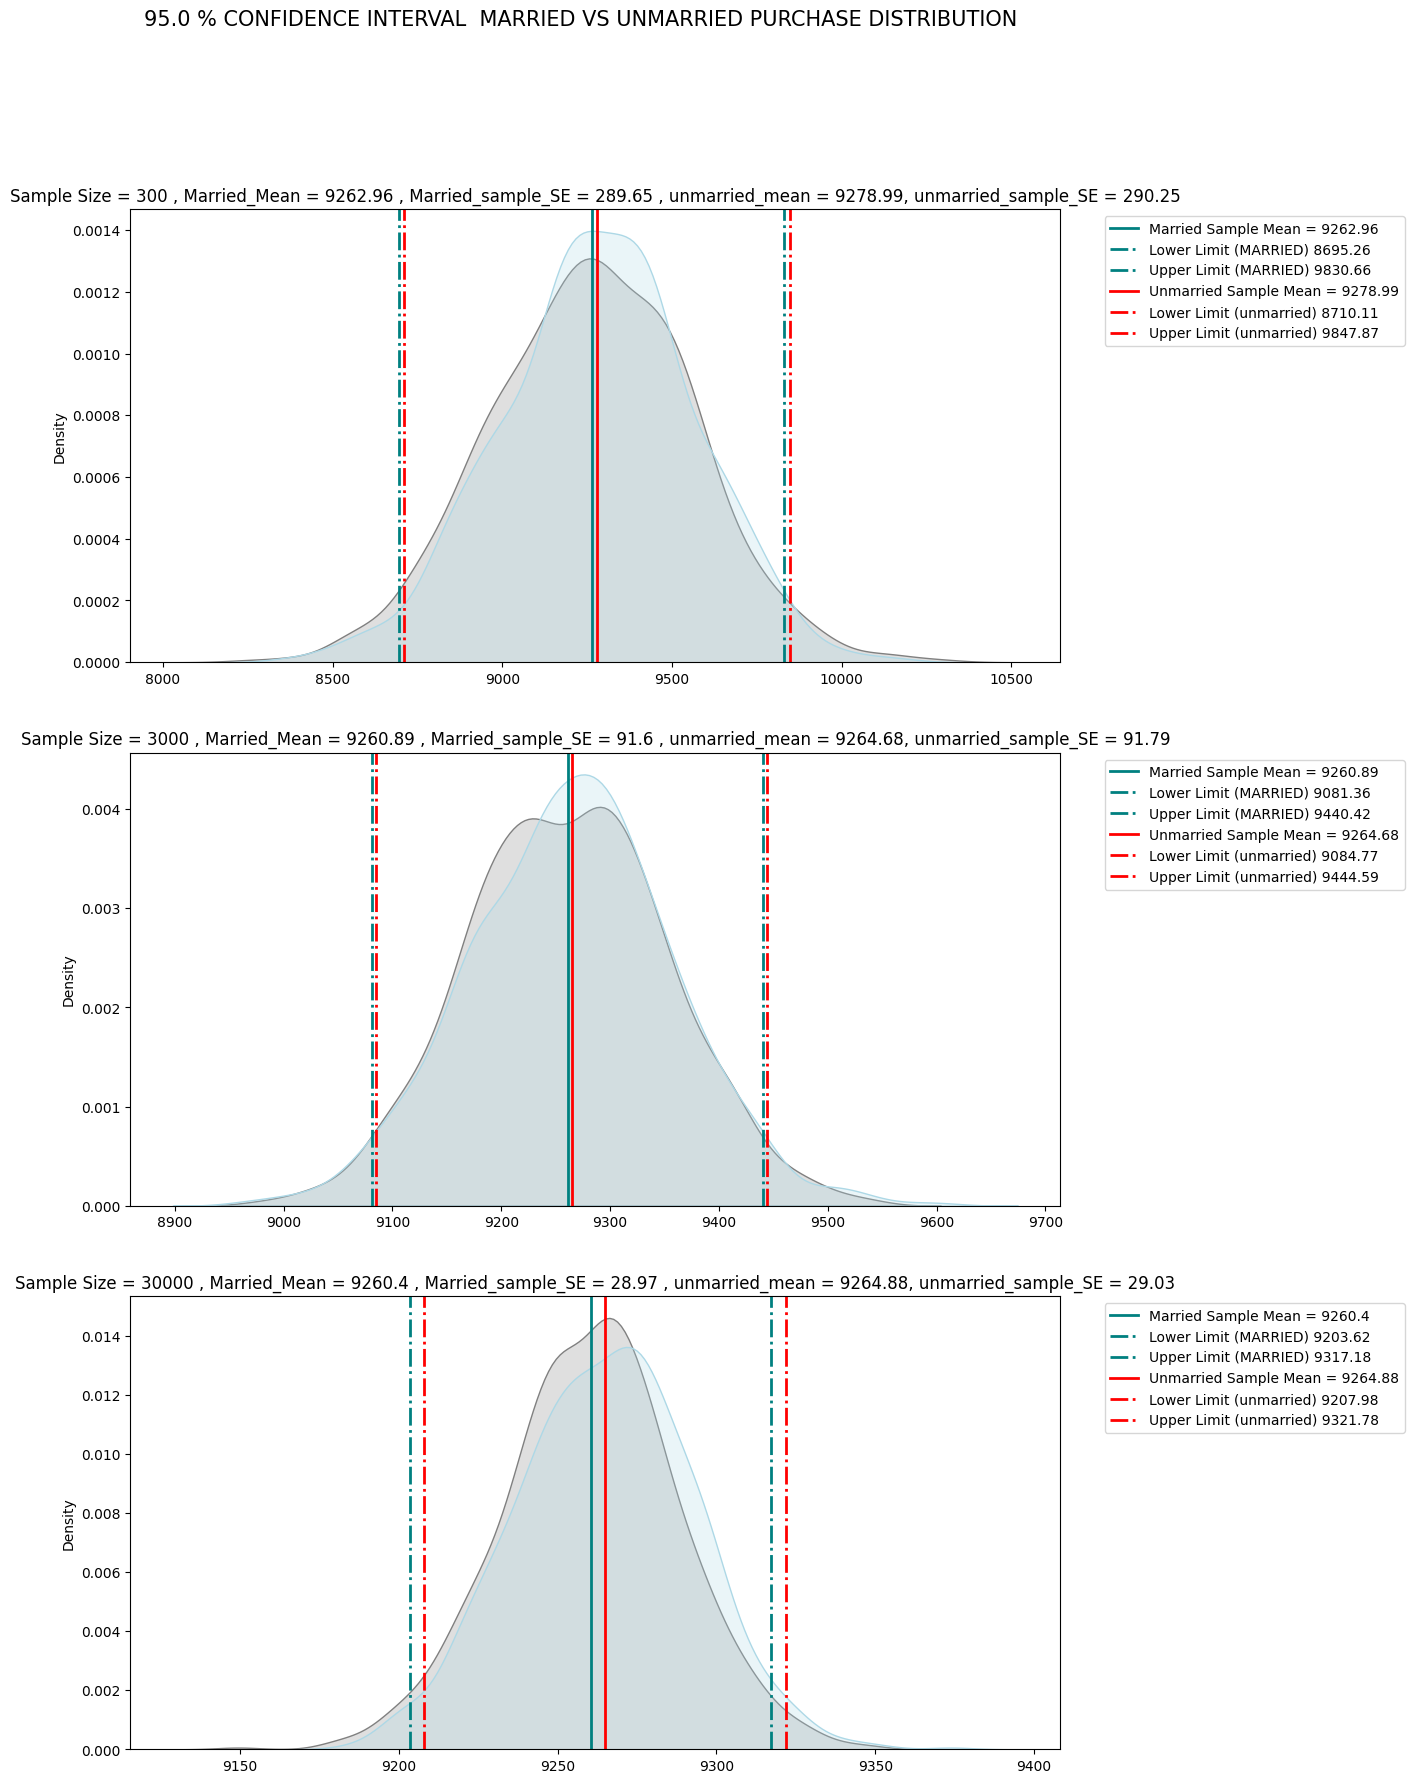

In [ ]:
mclt(95)

# 99 % Confidence Interval

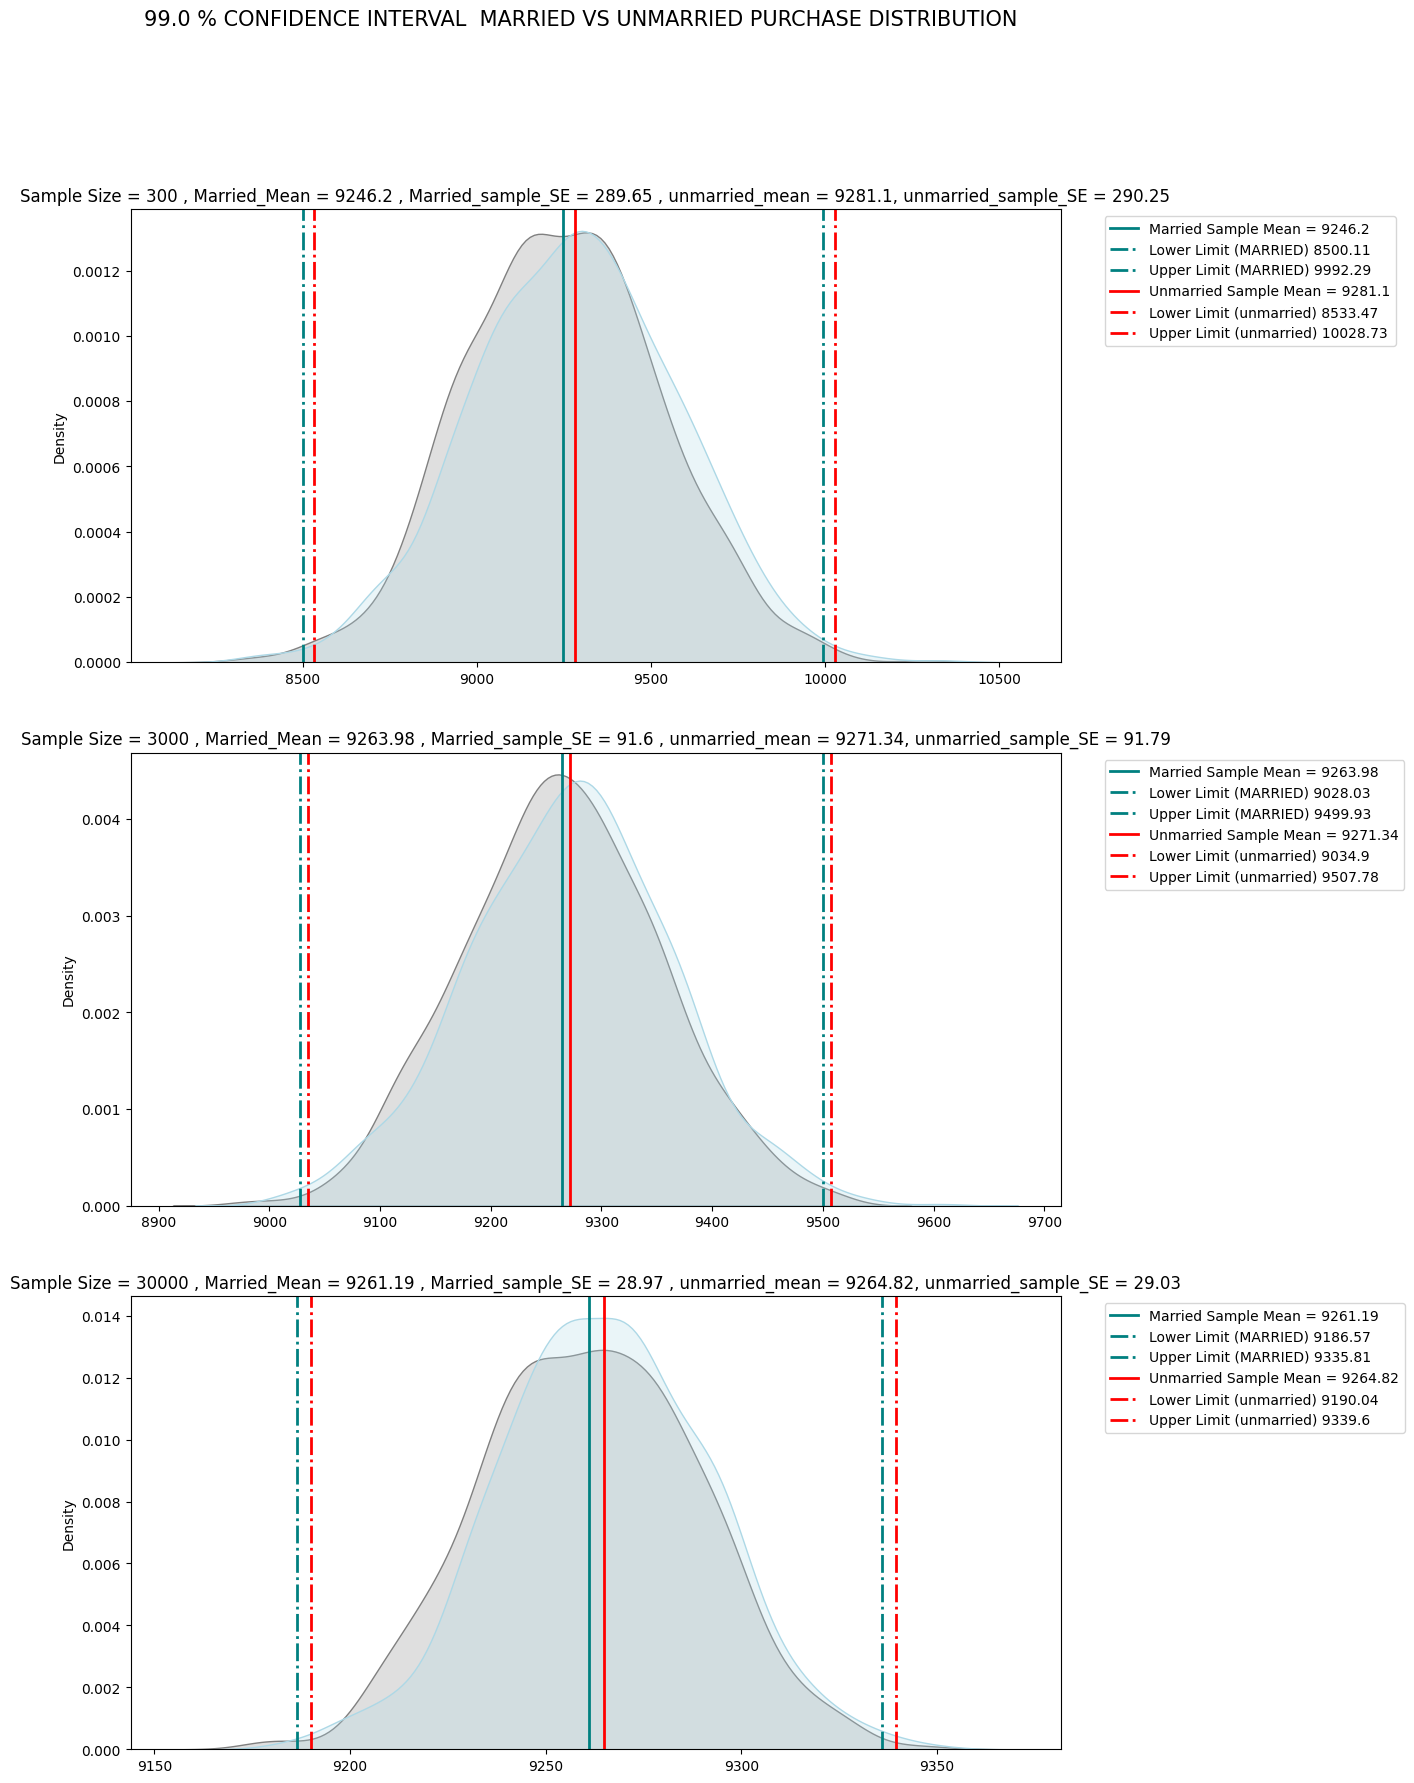

In [ ]:
mclt(99)

In [ ]:
temp2 = {"Marital_Status" : MS_Status, "Sample_size": MS_Sample_Size ,"Sample_mean" : MS_Sample_mean, "Lower_limit" : MS_Lower_limit , "Upper_limit": MS_Upper_limit , "CI" : MS_CI }

In [ ]:
MS_Overlap = pd.DataFrame(temp2)

In [ ]:
MS_Overlap["CI_Range"] = MS_Overlap["Upper_limit"] - MS_Overlap["Lower_limit"]

In [ ]:
MS_Overlap

Marital_Status  Sample_size  Sample_mean  Lower_limit  Upper_limit    CI  \
0         Married          300      9247.74      8771.31      9724.17  90.0   
1       Unmarried          300      9268.32      8790.90      9745.74  90.0   
2         Married         3000      9262.53      9111.86      9413.20  90.0   
3       Unmarried         3000      9265.80      9114.82      9416.78  90.0   
4         Married        30000      9262.39      9214.74      9310.04  90.0   
5       Unmarried        30000      9267.44      9219.69      9315.19  90.0   
6         Married          300      9262.96      8695.26      9830.66  95.0   
7       Unmarried          300      9278.99      8710.11      9847.87  95.0   
8         Married         3000      9260.89      9081.36      9440.42  95.0   
9       Unmarried         3000      9264.68      9084.77      9444.59  95.0   
10        Married        30000      9260.40      9203.62      9317.18  95.0   
11      Unmarried        30000      9264.88      9207.98      9321.78  95.0   
12        Married          300      9246.20      8500.11      9992.29  99.0   
13      Unmarried          300      9281.10      8533.47     10028.73  99.0   
14        Married         3000      9263.98      9028.03      9499.93  99.0   
15      Unmarried         3000      9271.34      9034.90      9507.78  99.0   
16        Married        30000      9261.19      9186.57      9335.81  99.0   
17      Unmarried        30000      9264.82      9190.04      9339.60  99.0   

    CI_Range  
0     952.86  
1     954.84  
2     301.34  
3     301.96  
4      95.30  
5      95.50  
6    1135.40  
7    1137.76  
8     359.06  
9     359.82  
10    113.56  
11    113.80  
12   1492.18  
13   1495.26  
14    471.90  
15    472.88  
16    149.24  
17    149.56

**🔍Insights :**

- Sample Size and Confidence Intervals:

  As the sample size increases, confidence intervals for both married and unmarried groups narrow significantly. For example, at a sample size of 30,000, the CI range for married individuals is 95.30, and for unmarried individuals, it is 95.50 at 90% confidence.
- Similar Purchase Patterns:

  Across all confidence levels, married and unmarried individuals exhibit nearly identical average purchase estimates. For instance, at a 95% confidence level with a sample size of 30,000, the average purchase estimates are 9260.40 for married and 9264.88 for unmarried individuals


**🛠 Recommendation**
- Unified Marketing Strategies:

  Given the nearly identical purchase behavior of married and unmarried individuals, a unified marketing approach targeting both groups could be effective. Consider broad campaigns that resonate with general consumer behaviors rather than focusing on marital status distinctions.
- Sample Size Consideration:

  To ensure precise and reliable estimates, larger sample sizes should be prioritized in future analyses. This will reduce uncertainty and lead to more confident decision-making in targeting strategies.

# Age Vs Purchase

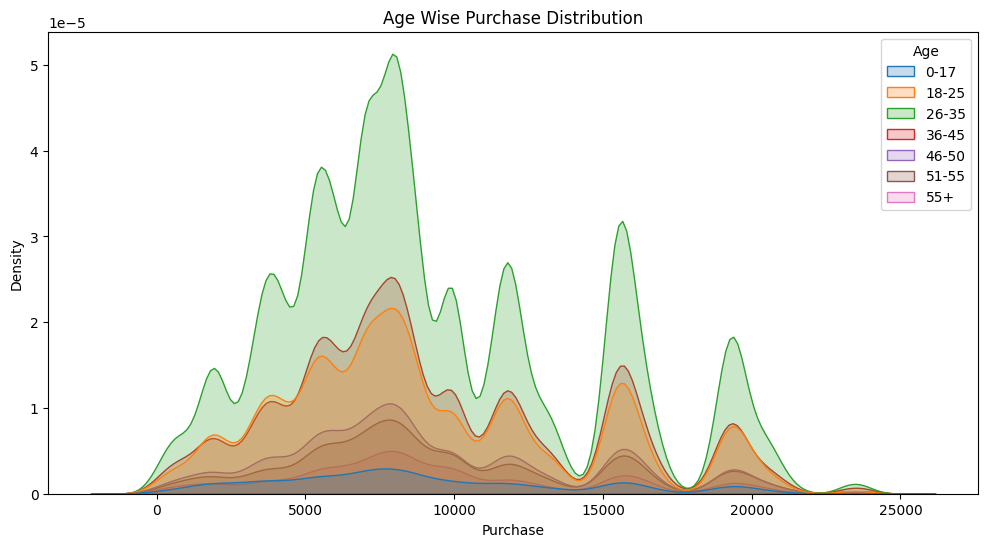

In [ ]:
plt.figure(figsize = (12,6))
sns.kdeplot(data = data ,x = "Purchase",hue = "Age",fill = True)
plt.title("Age Wise Purchase Distribution")
plt.show()

In [ ]:
data.groupby("Age")["Purchase"].describe()

count         mean          std   min     25%     50%      75%  \
Age                                                                        
0-17    15102.0  8933.464640  5111.114046  12.0  5328.0  7986.0  11874.0   
18-25   99660.0  9169.663606  5034.321997  12.0  5415.0  8027.0  12028.0   
26-35  219587.0  9252.690633  5010.527303  12.0  5475.0  8030.0  12047.0   
36-45  110013.0  9331.350695  5022.923879  12.0  5876.0  8061.0  12107.0   
46-50   45701.0  9208.625697  4967.216367  12.0  5888.0  8036.0  11997.0   
51-55   38501.0  9534.808031  5087.368080  12.0  6017.0  8130.0  12462.0   
55+     21504.0  9336.280459  5011.493996  12.0  6018.0  8105.5  11932.0   

           max  
Age             
0-17   23955.0  
18-25  23958.0  
26-35  23961.0  
36-45  23960.0  
46-50  23960.0  
51-55  23960.0  
55+    23960.0

🔍 Insights :

- Highest Average Spending:

  The 51-55 age group has the highest average purchase amount at 9534.81, indicating this group tends to spend more per transaction compared to other age groups.
- Age Group Distribution:

  The majority of purchases come from the 26-35 age group, with an average spending of 9252.69, showing their significant contribution to overall sales.
- Distribution Analysis:

  The purchase amounts across all age groups are not normally distributed, indicating the need for careful analysis in designing effective marketing strategies.

In [141]:
age_groups = ['0-17','18-25', '26-35','36-45','46-50','51-55','55+']
sample_size = [300 , 3000 , 30000]
num_sample = 1000
Age_Group = []
Age_Sample_size = []
Age_Lower_limit = []
Age_Upper_limit = []
Age_Sample_mean = []
Age_CI = []

In [142]:
def age_ci(ci):


  plt.figure(figsize = (14, 10))
  for age in age_groups:
    temp = data.loc[data["Age"] == age]["Purchase"]


    for n ,j in enumerate(sample_size):
      plt.subplot(3,1,n+1)

      data_sample = [np.mean(temp.sample(j,replace = True)) for k  in range(num_sample)]
      data_sample_mean = np.mean(data_sample).round(2)
      data_sample_se = data.loc[data["Age"]==age]["Purchase"].std()/np.sqrt(j)
      data_sample_se = data_sample_se.round(2)
      data_sample_lower_limit,data_sample_upper_limit =  norm.interval(ci/100,loc = data_sample_mean,scale = data_sample_se)
      data_sample_lower_limit = data_sample_lower_limit.round(2)
      data_sample_upper_limit = data_sample_upper_limit.round(2)


      Age_Group.append(age)
      Age_Sample_size.append(j)
      Age_Lower_limit.append(data_sample_lower_limit)
      Age_Upper_limit.append(data_sample_upper_limit)
      Age_Sample_mean.append(data_sample_mean)
      Age_CI.append(ci)


      sns.kdeplot(data_sample, fill = True,label=f'{age}')
      plt.legend(title= "Age_Groups")
      plt.title(f"Sample Size {j}")
  plt.suptitle(f"Age-Wise Purchase Distribution for {ci}% Confidence Interval ")
  plt.tight_layout()
  plt.show()


# 90 % Confidence Interval

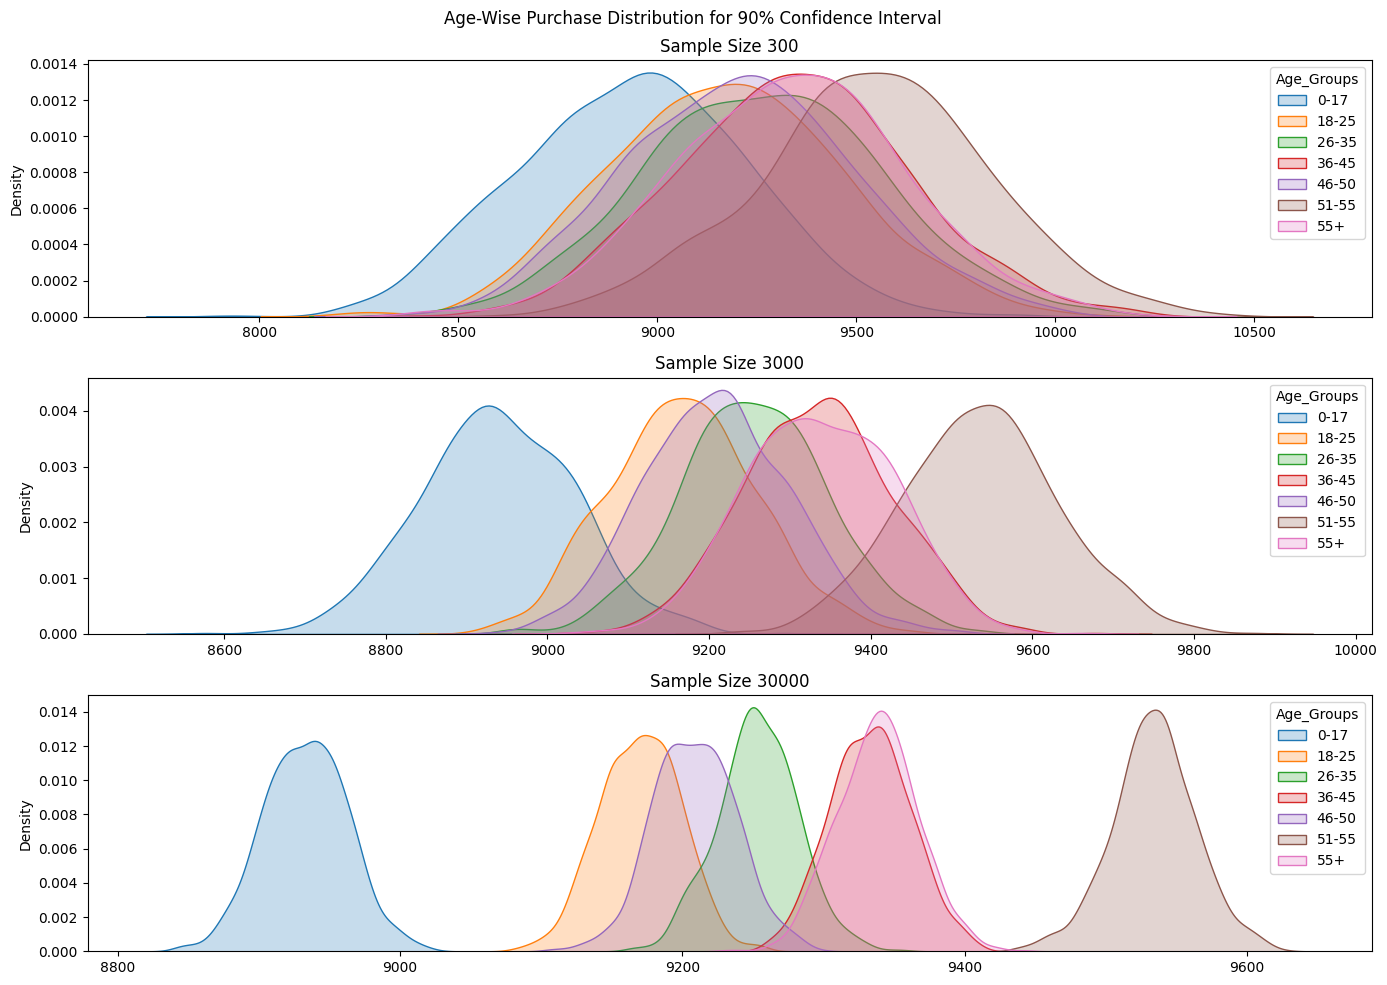

In [143]:
age_ci(90) # Confidence Interval Data stored in dataframe

# 95 % Confidence Interval

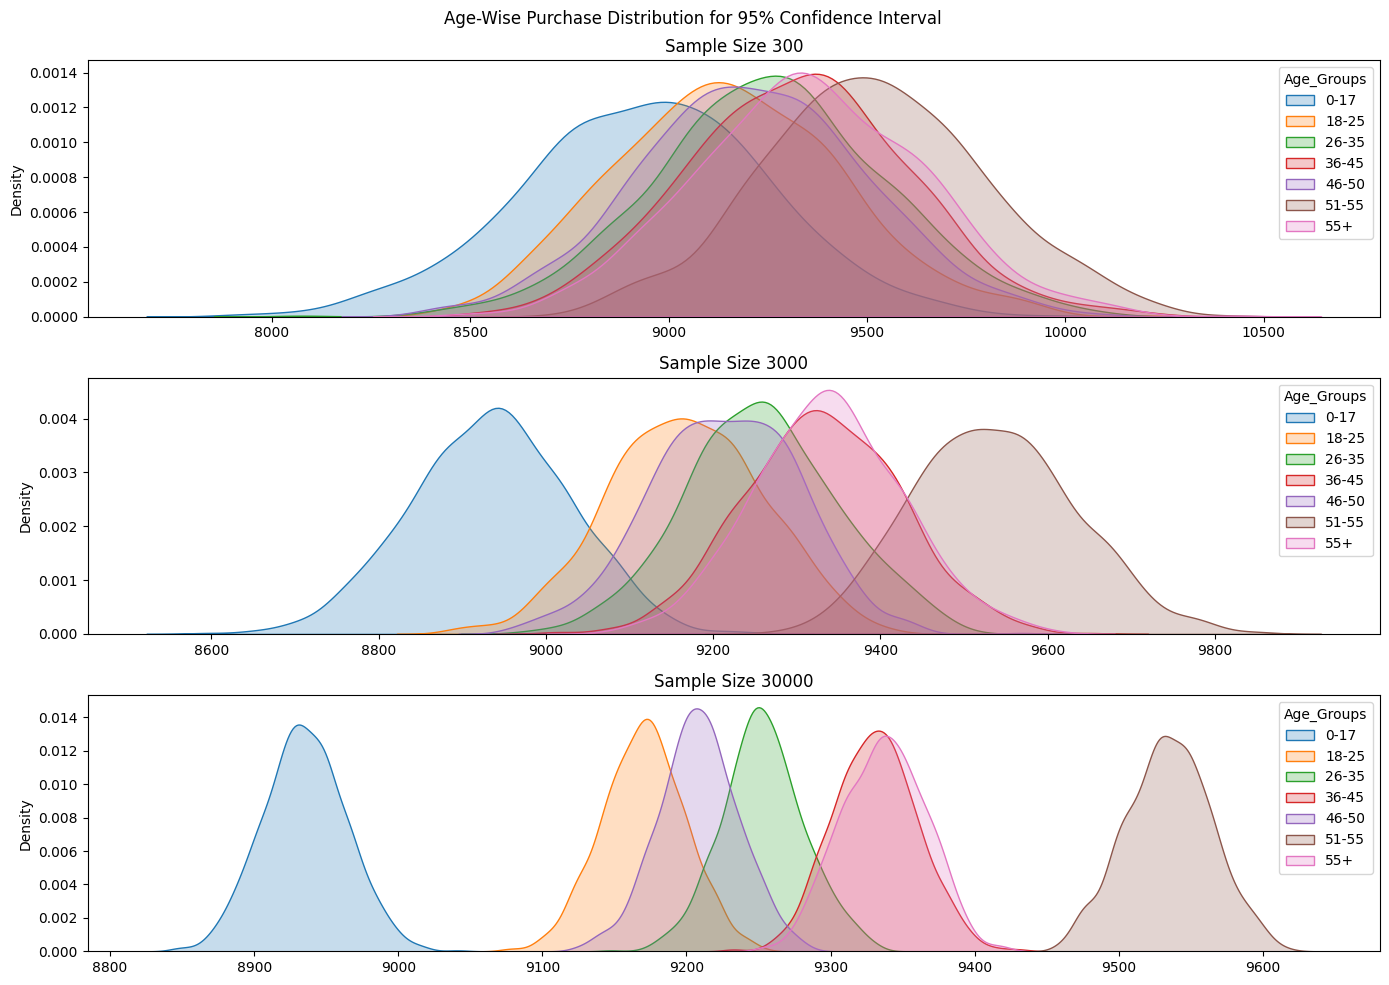

In [144]:
age_ci(95) # Confidence Interval Data stored in dataframe

# 99 % Confidence Interval

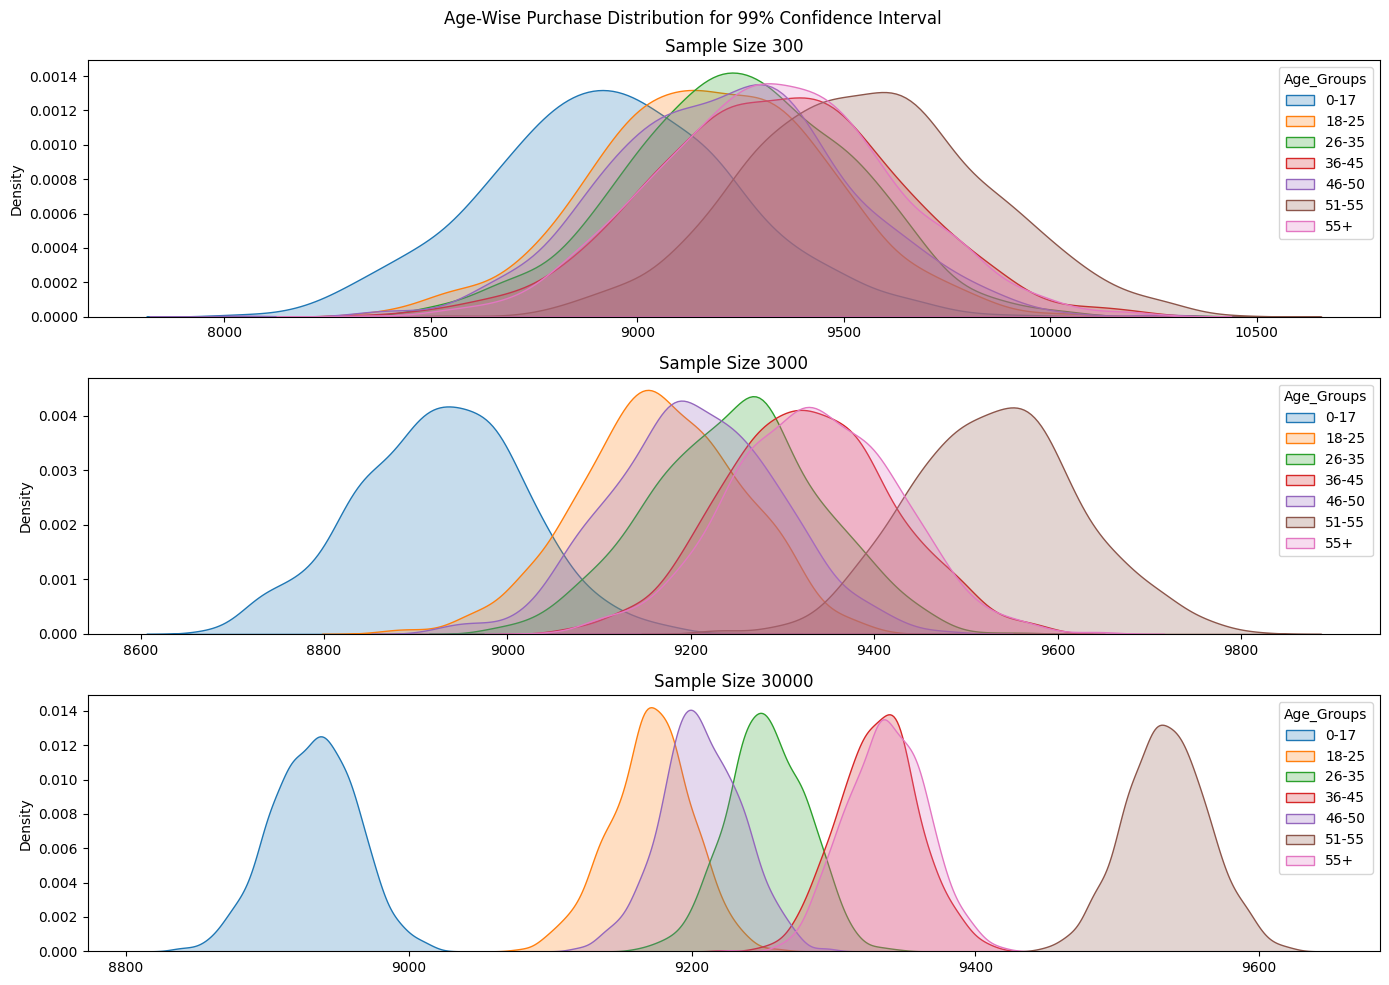

In [145]:
age_ci(99) # Confidence Interval Data stored in dataframe

In [146]:
temp3  = {"Age_Group" : Age_Group, "Sample_Size" : Age_Sample_size , "Sample_Mean" : Age_Sample_mean ,"Lower_Limit": Age_Lower_limit, "Upper_Limit":Age_Upper_limit , "CI": Age_CI}
Age_Overlap  = pd.DataFrame(temp3)
Age_Overlap["CI Range"] = Age_Overlap["Upper_Limit"] - Age_Overlap["Lower_Limit"]

**DataFrame With Record of Each Confindence Intervals**

In [147]:
Age_Overlap

Age_Group  Sample_Size  Sample_Mean  Lower_Limit  Upper_Limit  CI  CI Range
0       0-17          300      8938.08      8452.70      9423.46  90    970.76
1       0-17         3000      8937.99      8784.49      9091.49  90    307.00
2       0-17        30000      8932.95      8884.41      8981.49  90     97.08
3      18-25          300      9174.52      8696.43      9652.61  90    956.18
4      18-25         3000      9167.68      9016.50      9318.86  90    302.36
..       ...          ...          ...          ...          ...  ..       ...
58     51-55         3000      9531.44      9292.20      9770.68  99    478.48
59     51-55        30000      9534.70      9459.05      9610.35  99    151.30
60       55+          300      9329.94      8584.65     10075.23  99   1490.58
61       55+         3000      9332.97      9097.28      9568.66  99    471.38
62       55+        30000      9336.92      9262.40      9411.44  99    149.04

[63 rows x 7 columns]

**🔍 Insights**

- Impact of Sample Size on Precision

  The data shows that as the sample size increases, the confidence intervals narrow, leading to more precise estimates. For example, for the age group 18-25 with a sample size of 300, the sample mean is around 9150, with a confidence interval ranging from approximately 8500 to 9700. In contrast, with a sample size of 30000, the confidence interval tightens significantly, indicating more reliable insights.

- Spending Patterns Across Age Groups

  The age group 51-55 consistently shows the highest spending per transaction across various sample sizes, with a sample mean around 9500. This age group also maintains relatively narrow confidence intervals (e.g., 95% CI ranging from approximately 9380 to 9690), suggesting stable and higher spending behavior.

- Overlapping Confidence Intervals

  The age groups 26-35, 36-45, and 55+ exhibit overlapping confidence intervals, indicating similar spending patterns. For instance, the 55+ age group with a sample size of 3000 shows a mean close to 9330 with a 95% CI ranging from approximately 9180 to 9490, which is comparable to the 36-45 age group with similar sample sizes and intervals.

- Spending Disparities in Younger Age Groups

  The youngest age group (0-17) consistently shows the lowest spending, with a sample mean close to 8930 and a wider confidence interval. For instance, with a sample size of 30000, the 90% CI ranges from approximately 8880 to 8980, indicating lower and more variable spending compared to older age groups.

**💡 Recommendations**

- Tailored Marketing for High-Spending Age Groups

  Given that the 51-55 age group consistently shows the highest spending, consider targeted marketing campaigns offering premium services, personalized recommendations, or loyalty programs to retain and further engage this demographic.

- Segmentation Strategy for Similar Spending Groups

  Since age groups 26-35, 36-45, and 55+ exhibit similar spending patterns, Walmart could optimize product offerings and promotions that cater specifically to the combined preferences of these age groups, streamlining marketing efforts and inventory management.

- Incentives for Younger Shoppers

  The lower spending in the 0-17 age group suggests an opportunity to increase their transaction values. Offering attractive discounts, rewards, or products that appeal to younger shoppers could help boost their spending and build long-term customer loyalty.

- Leverage Precise Estimates for Operational Decisions

  As larger sample sizes yield more precise spending estimates, Walmart should use data from extensive samples to make critical operational decisions, such as inventory management and pricing strategies, ensuring decisions are based on the most reliable data.


# **Overall Recommendations**

1. Target High-Spending Demographics

  - Male Customers: Men consistently spend more than women on average. Focus on retaining male customers by offering tailored promotions and exclusive deals, particularly in categories where they spend the most.
  - Unmarried Customers: Unmarried customers also tend to spend more. Prioritize acquiring and retaining this group with targeted marketing and special offers.
2. Focus on Key Age Groups

  - Ages 18-45: Customers in this age range are responsible for the majority of sales. Tailor product offerings, promotions, and marketing efforts to cater specifically to their preferences. Consider offering exclusive deals on products popular among this demographic.
  - Ages 51-55: This age group has the highest spending per transaction. Enhance their shopping experience with personalized recommendations, loyalty programs, and exclusive pre-sale access to drive further engagement and spending.
3. Optimize Product Strategy

  - Popular Product Categories: Focus on promoting products in the top-performing categories (e.g., categories 1, 5, 8, and 11). Consider bundling these products with less popular items to boost overall sales.
  - City-Specific Strategy: Male customers in City Category C spend more than those in other cities. Tailor promotions and product offerings specifically for this region to maximize revenue.
4. Engage Younger and Female Shoppers

  - Younger Shoppers (0-17): Increase spending among this group by offering engaging activities, such as in-store games or special discounts. Building brand loyalty at a young age can lead to long-term customer retention.
  - Female Customers: Since women tend to spend less, create promotions and offers specifically tailored to their needs and preferences. Offering additional discounts or rewards programs may encourage higher spending.

5. Post-Purchase Engagement

  - Post-Sale Strategy: After major sales events like Black Friday, follow up with customers through personalized emails, offering related products or special discounts. This will help increase customer retention and encourage repeat business beyond the holiday season.